<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/autoencoder_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Auto Encoder for MNIST

In [22]:
from keras.layers import Input, Dense, Activation
from keras.models import Sequential
from keras.models import Model
from keras.datasets import mnist
from keras.optimizers import SGD
import numpy as np

encoding_dim = 10

In [23]:
# Data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [24]:
# Model definition
input_img = Input(shape=(784,))
#model = Sequential()
#model.add(Dense(encoding_dim, input_shape=(784,)))
#model.add(Activation('softmax'))
#model.add(Dense(784))
encoded = Dense(encoding_dim, activation='softmax', name='encoded')(input_img)
decoded = Dense(784)(encoded)
model = Model(inputs=input_img, outputs=decoded)


# Pring the model
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 encoded (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 784)               8624      
                                                                 
Total params: 16,474
Trainable params: 16,474
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Optimizer
#sgd = SGD(lr=0.5, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [26]:
# training the model
nepoch=1000
results = model.fit(x_train, x_train, epochs=nepoch, batch_size=256, shuffle=True, verbose=1, 
                                        validation_data=(x_test, x_test))


# save the model
#model.save_weights('autoencoder.h5')


Epoch 1/1000
235/235 [==============================] - 2s 5ms/step - loss: 0.0787 - mae: 0.1425 - val_loss: 0.0648 - val_mae: 0.1426
Epoch 2/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0598 - mae: 0.1371 - val_loss: 0.0560 - val_mae: 0.1321
Epoch 3/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0528 - mae: 0.1267 - val_loss: 0.0502 - val_mae: 0.1228
Epoch 4/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0486 - mae: 0.1203 - val_loss: 0.0472 - val_mae: 0.1181
Epoch 5/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0464 - mae: 0.1170 - val_loss: 0.0454 - val_mae: 0.1152
Epoch 6/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0447 - mae: 0.1142 - val_loss: 0.0439 - val_mae: 0.1129
Epoch 7/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0435 - mae: 0.1124 - val_loss: 0.0429 - val_mae: 0.1117
Epoch 8/1000
235/235 [==============================] - 1s 4ms

313/313 [==============================] - 0s 1ms/step


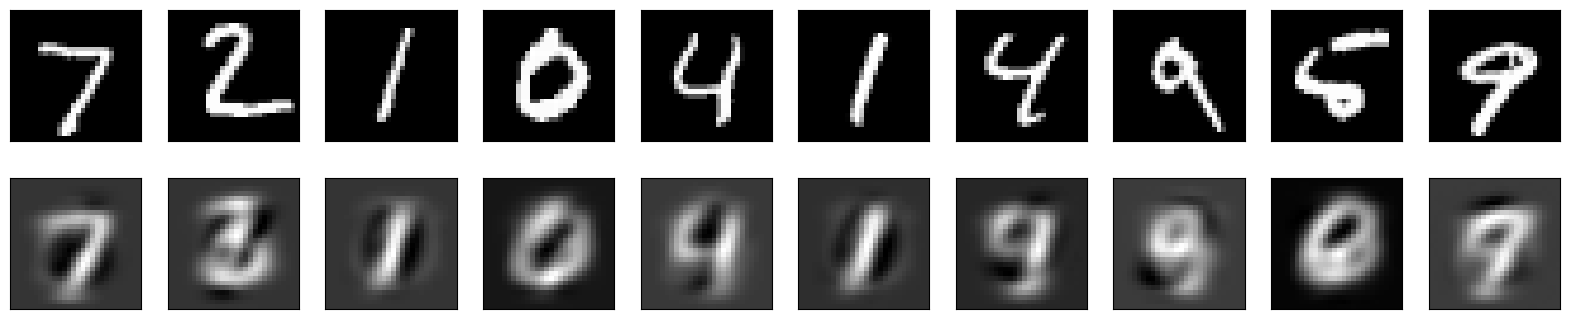

In [27]:
# display the images
%matplotlib inline
import matplotlib.pyplot as plt

decoded_imgs = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


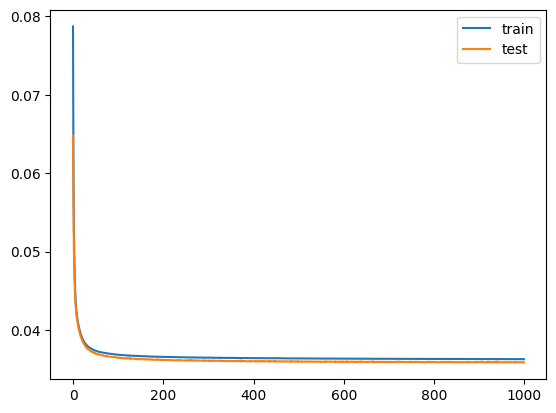

In [28]:
x = range(nepoch)
plt.plot(x, results.history['loss'], label='train')
plt.legend(loc='upper right')
plt.plot(x, results.history['val_loss'], label='test')
plt.legend(loc='upper right')

In [29]:
feature_extractor = Model(inputs=model.input, outputs=model.get_layer('encoded').output)
# Pring the model
feature_extractor.summary()
encoded_features = feature_extractor.predict(x_train)
print(encoded_features)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 encoded (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
1875/1875 [==============================] - 2s 1ms/step
[[0.09323404 0.11022521 0.11119159 ... 0.07596935 0.09240605 0.11490732]
 [0.15027012 0.10662815 0.08724289 ... 0.06586978 0.09329586 0.09604716]
 [0.09732313 0.10912427 0.09360839 ... 0.11556768 0.13588358 0.0878694 ]
 ...
 [0.09064324 0.11900135 0.11916538 ... 0.10451562 0.0855827  0.10579596]
 [0.12210467 0.09671529 0.11616437 ... 0.08262586 0.1014523  0.10255152]
 [0.10566743 0.07770904 0.

Shape is  (60000, 10)
[0 0 0 ... 0 0 0]
k= 0


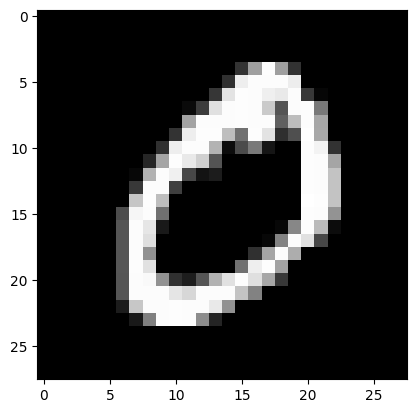

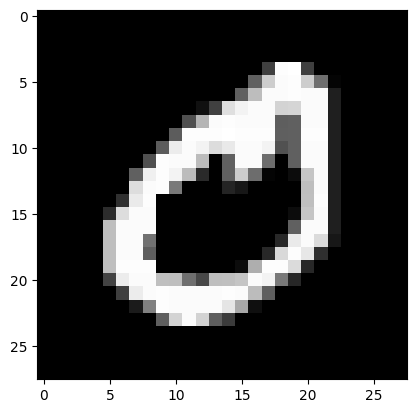

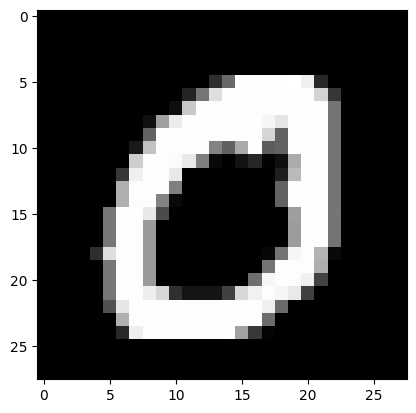

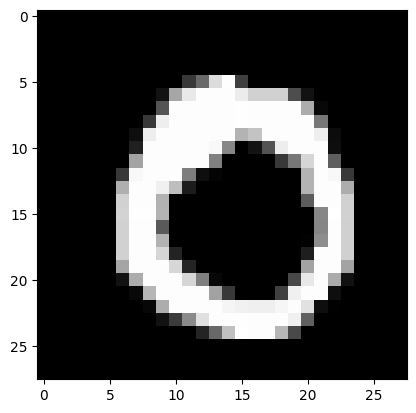

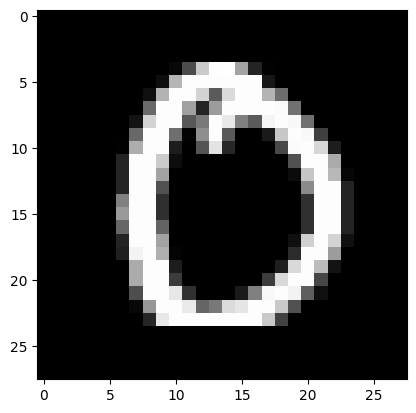

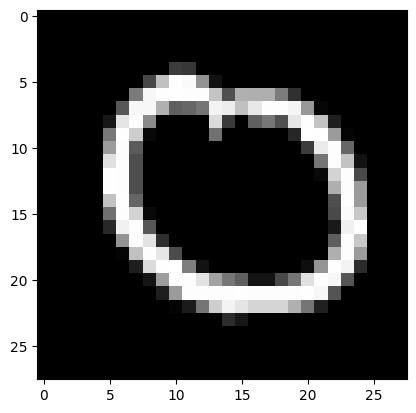

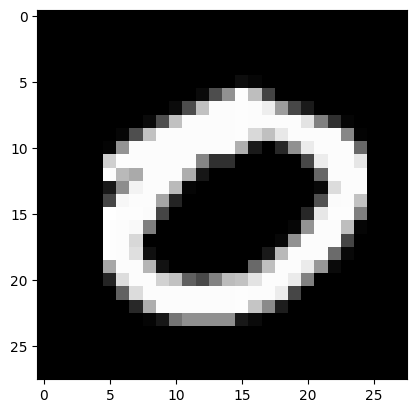

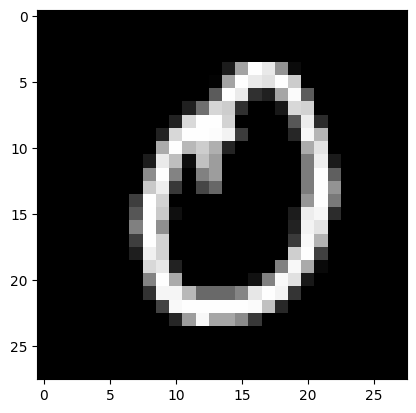

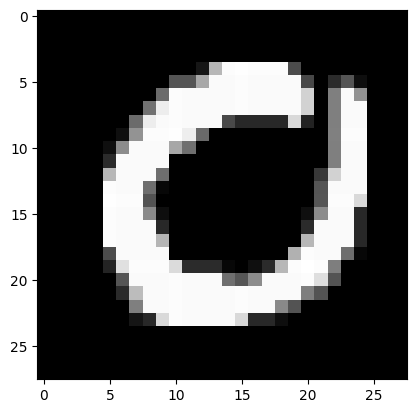

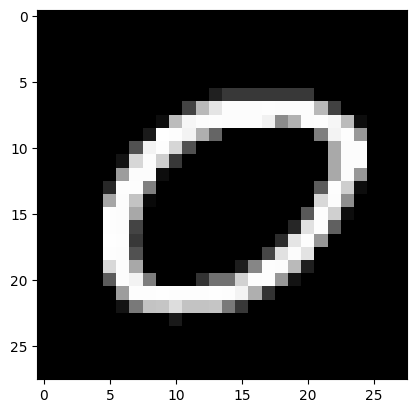

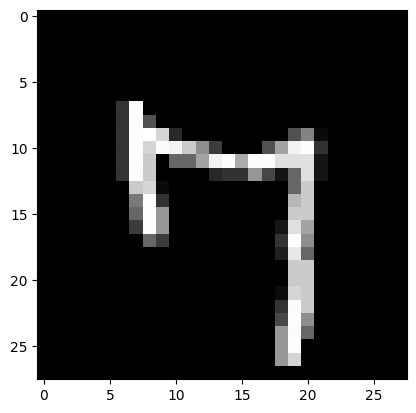

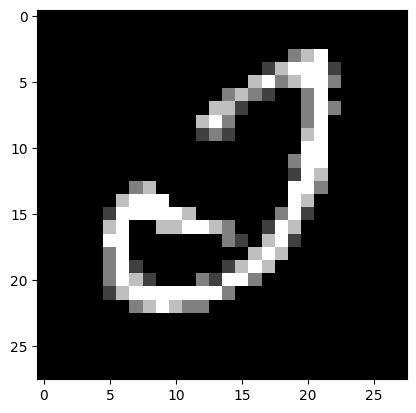

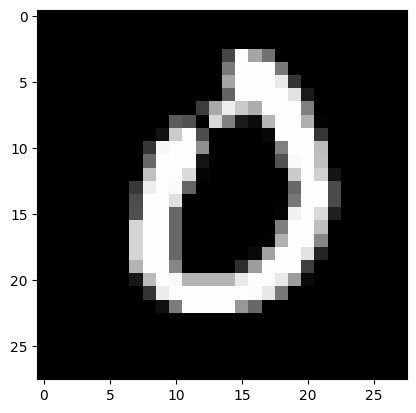

k= 1
k= 2


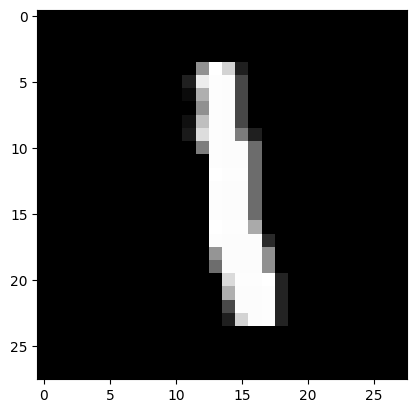

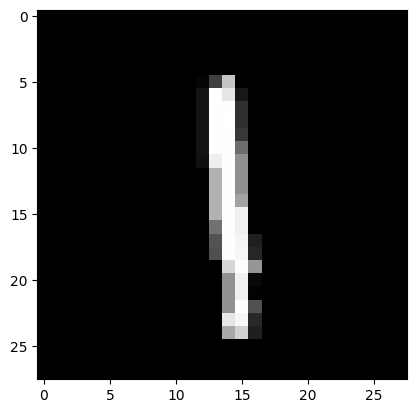

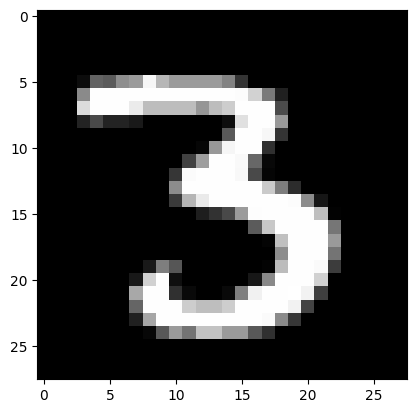

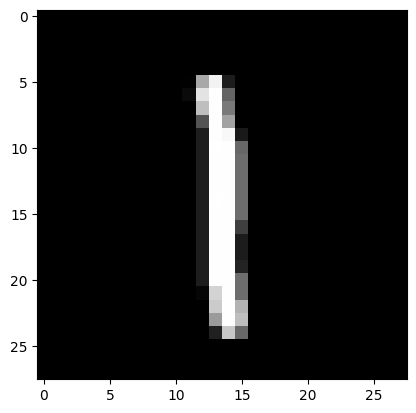

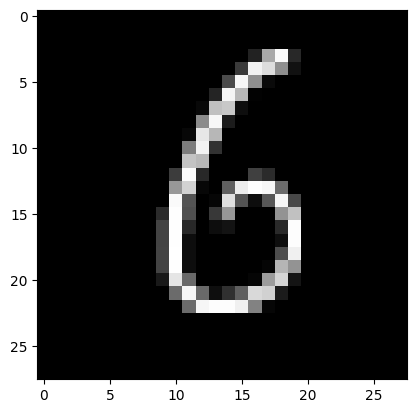

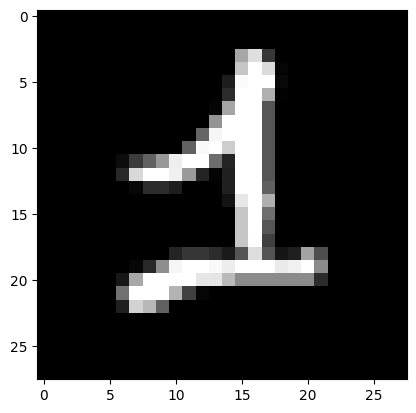

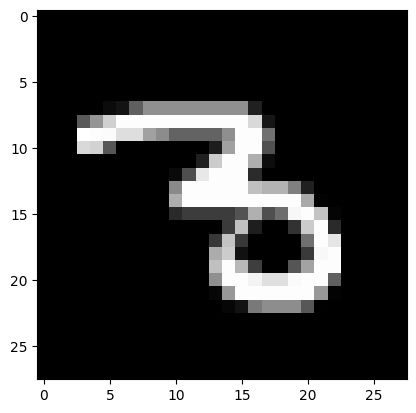

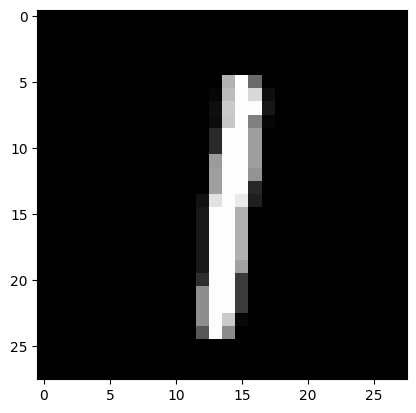

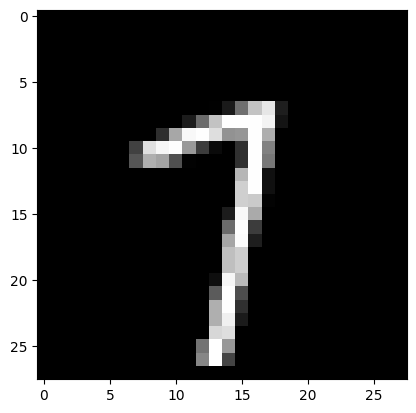

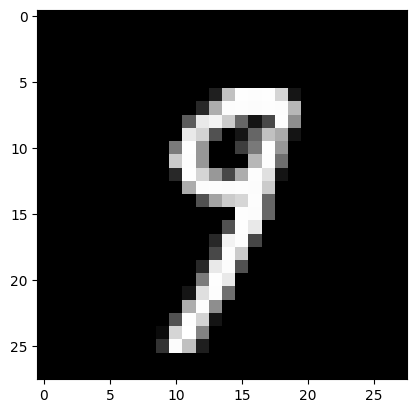

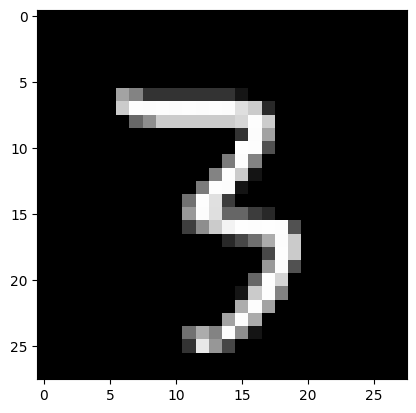

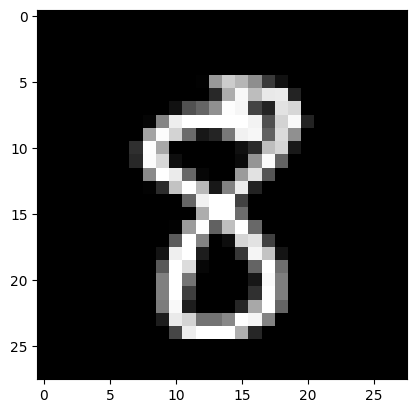

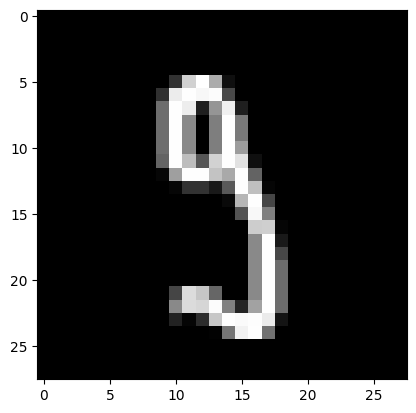

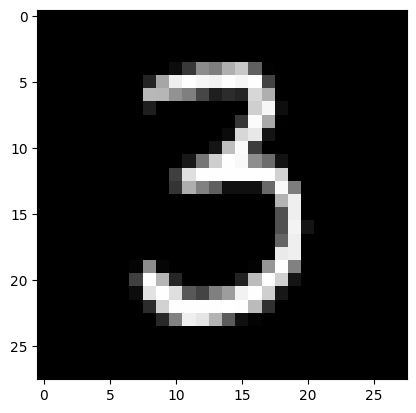

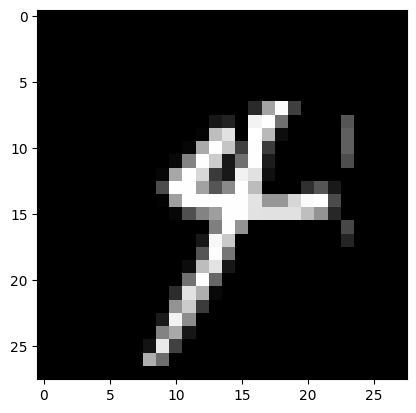

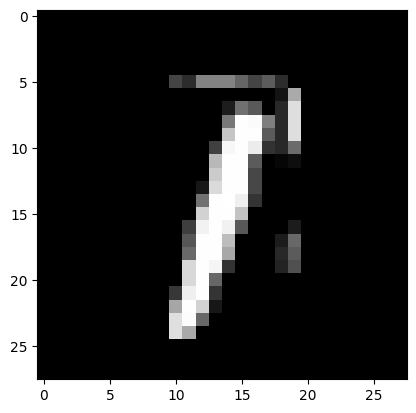

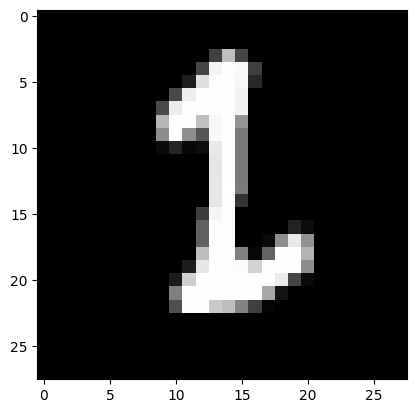

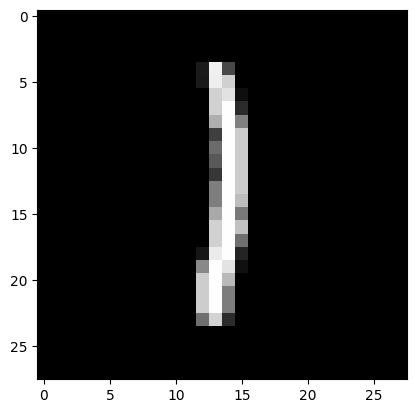

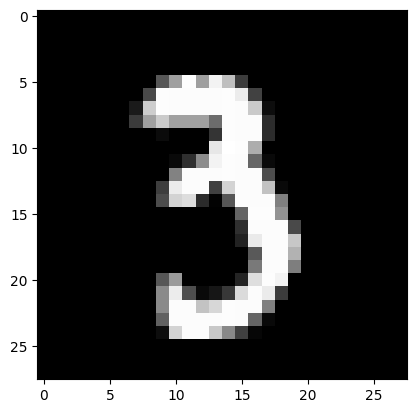

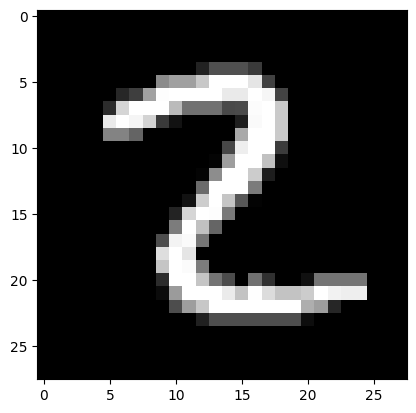

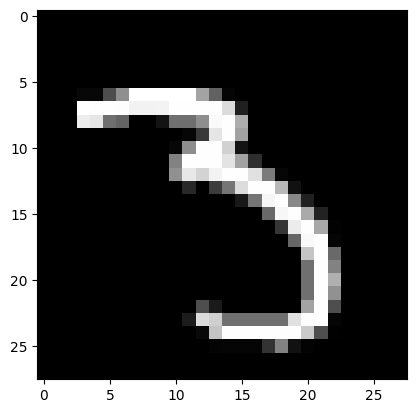

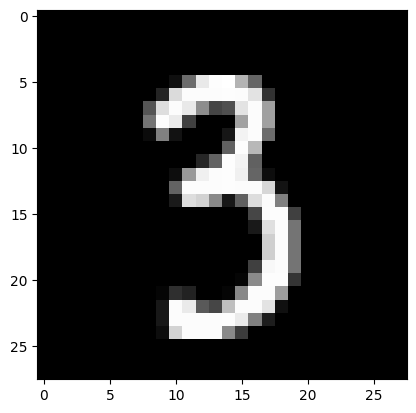

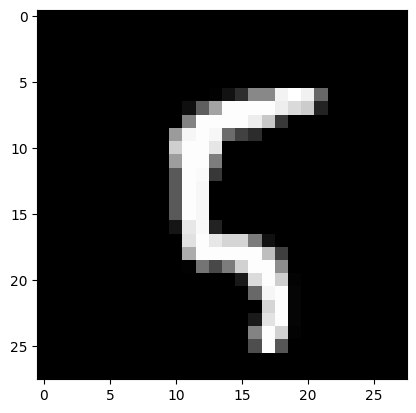

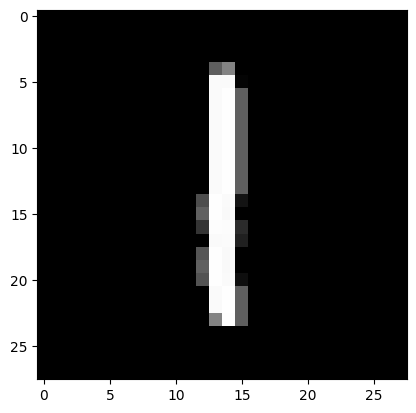

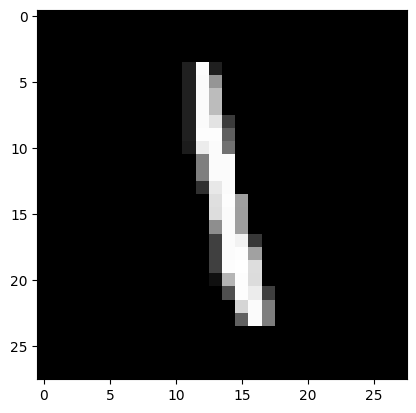

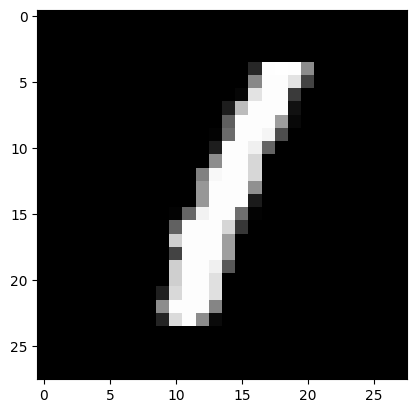

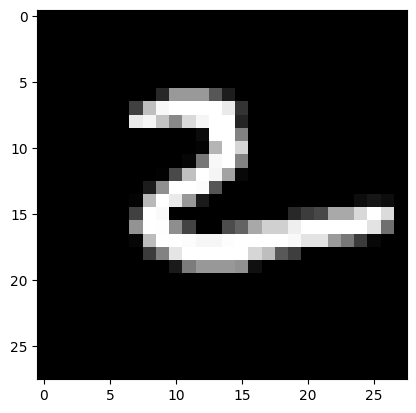

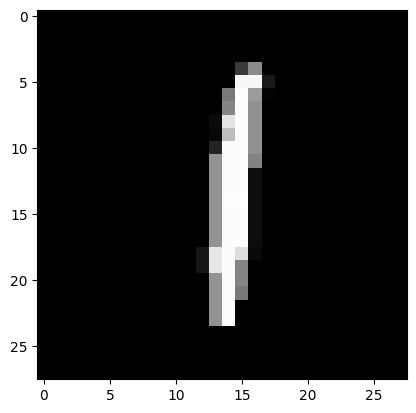

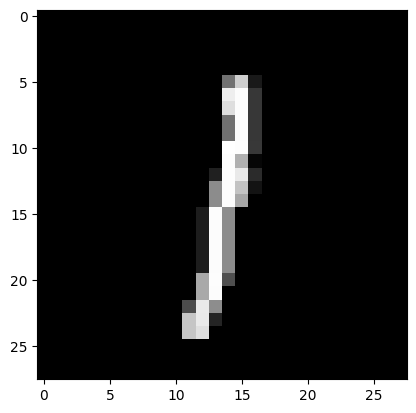

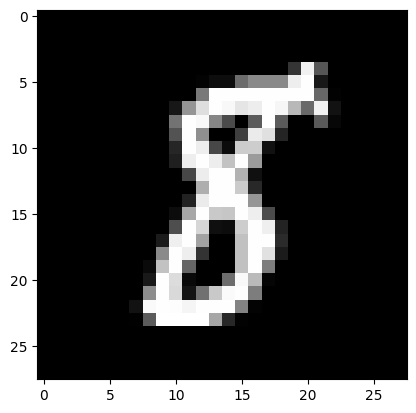

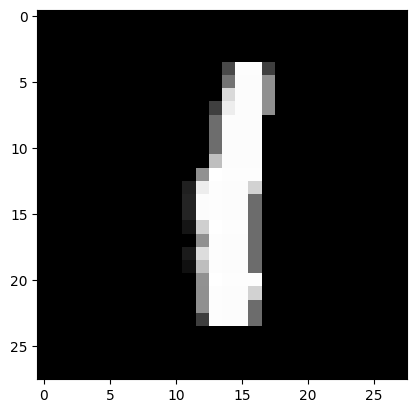

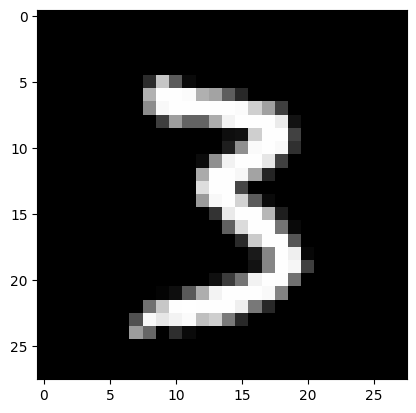

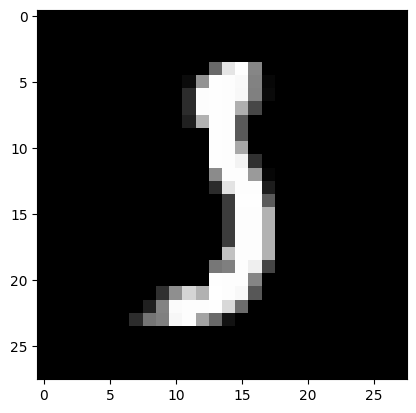

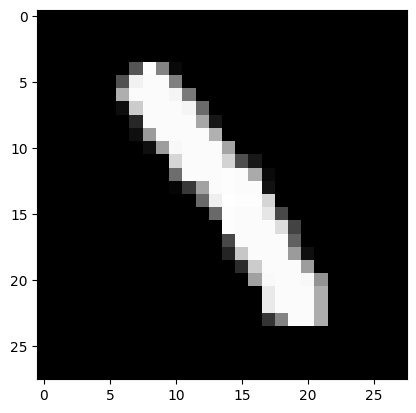

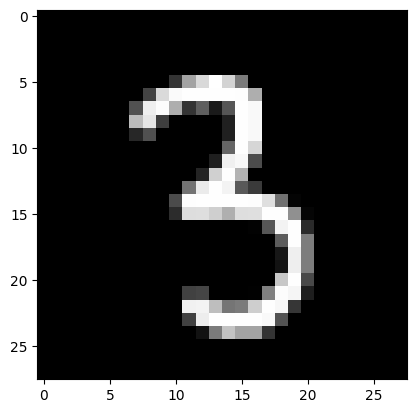

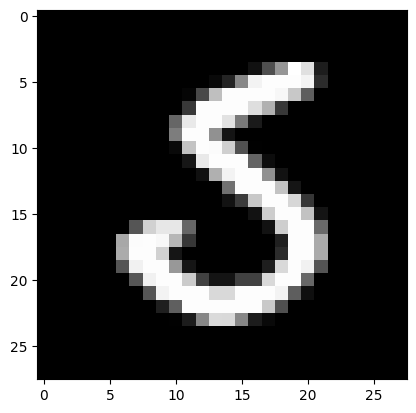

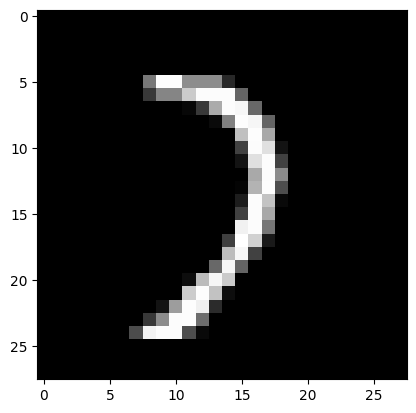

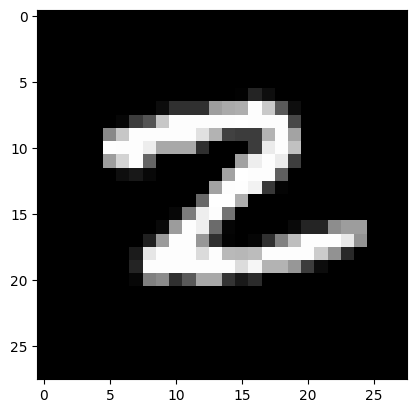

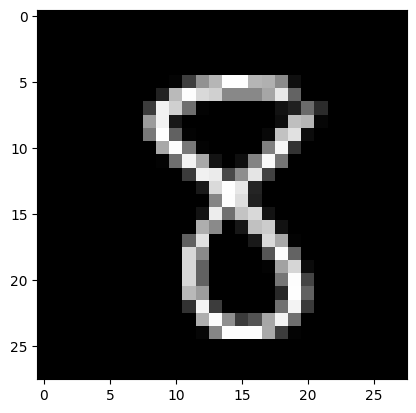

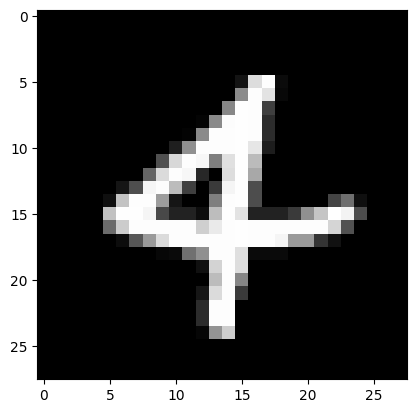

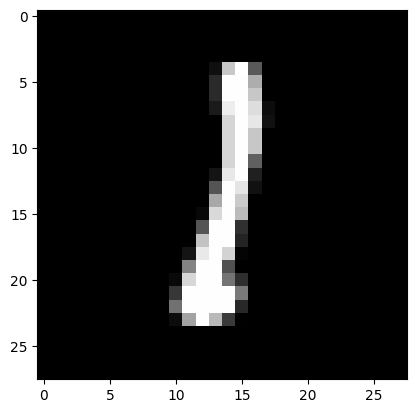

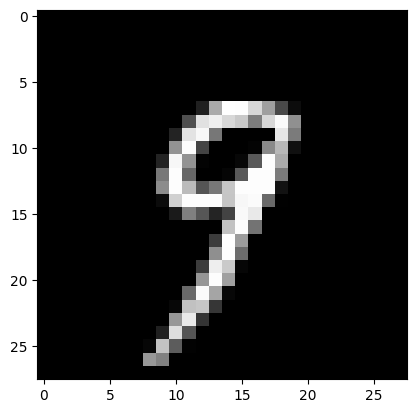

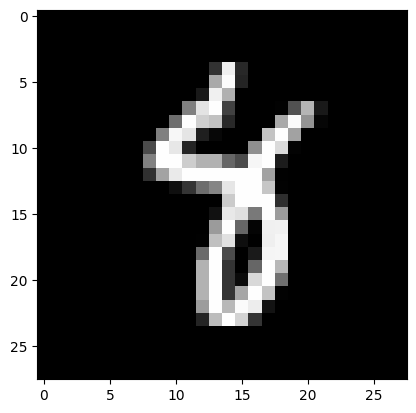

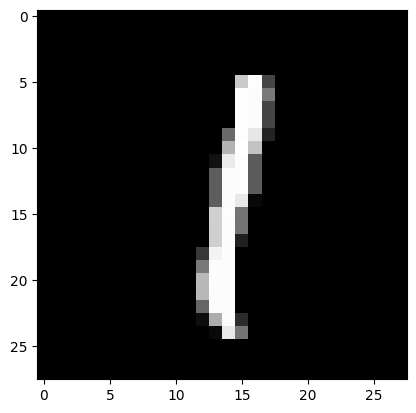

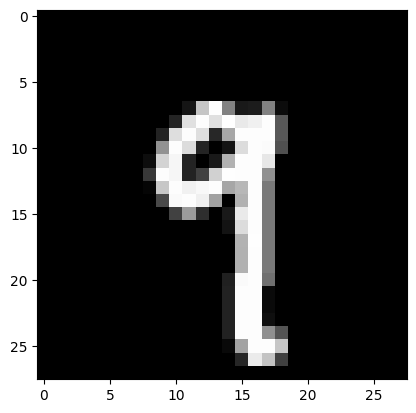

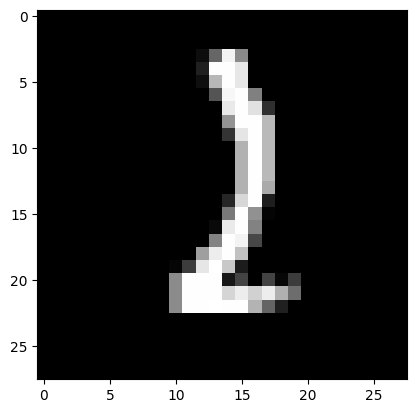

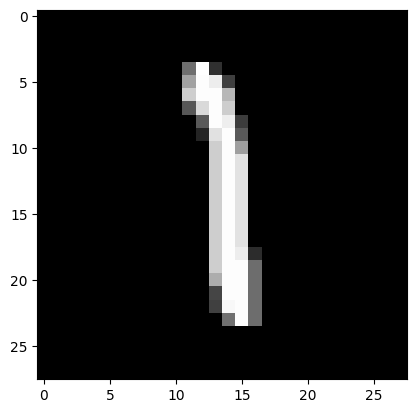

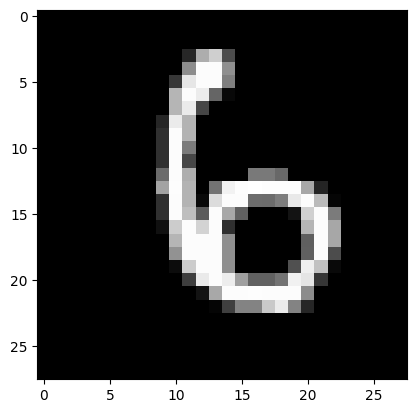

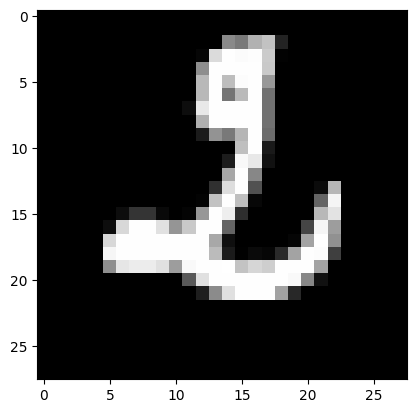

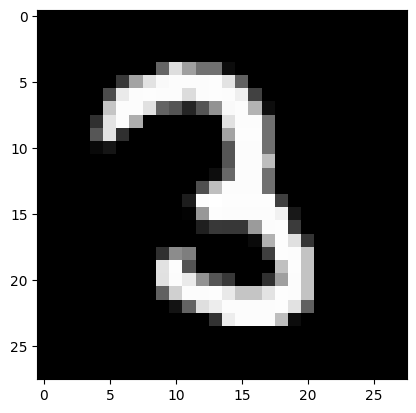

k= 3


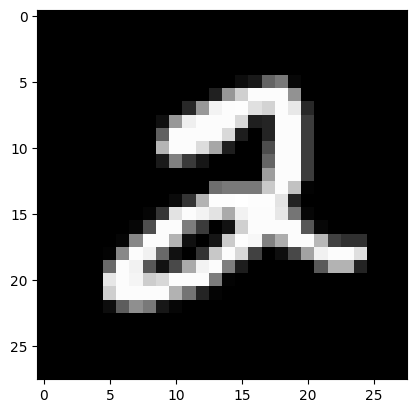

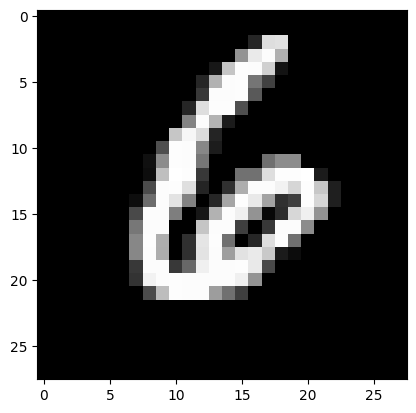

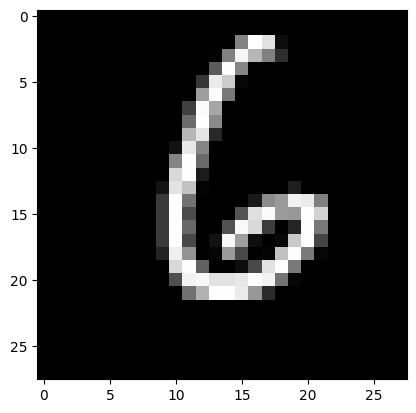

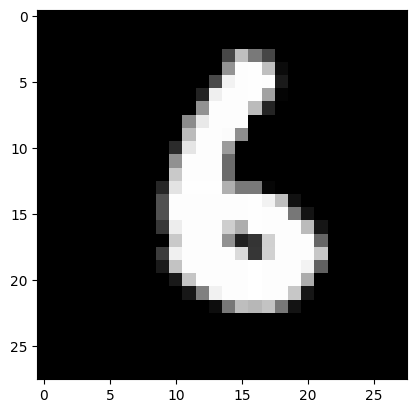

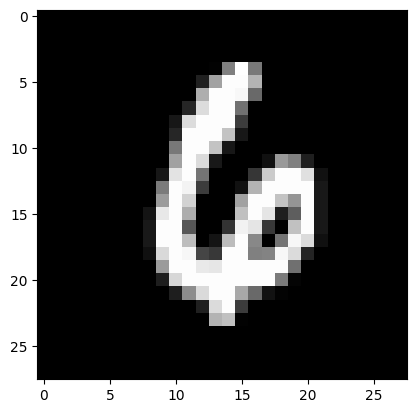

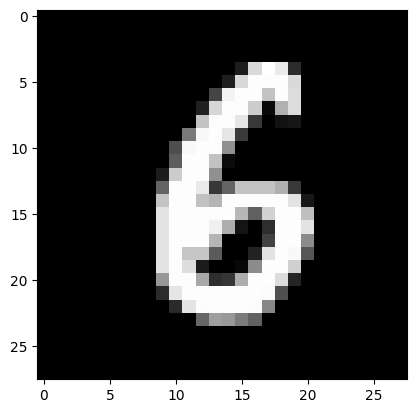

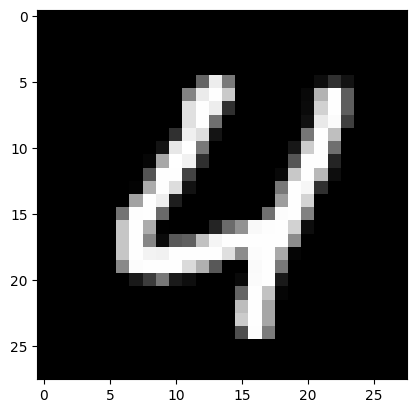

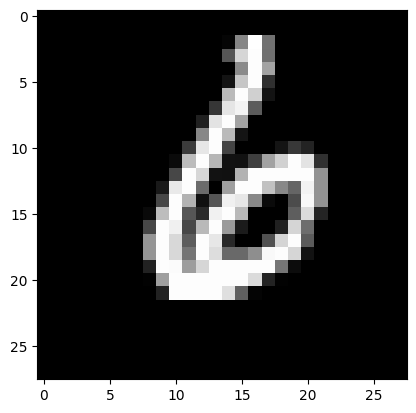

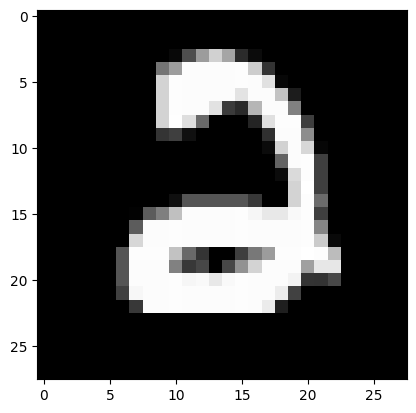

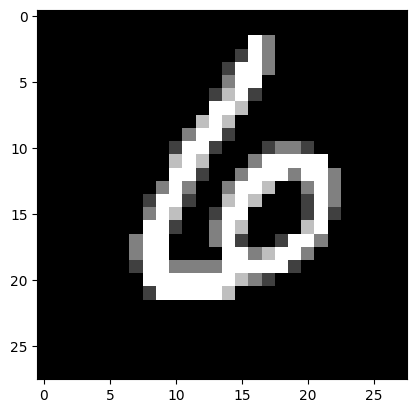

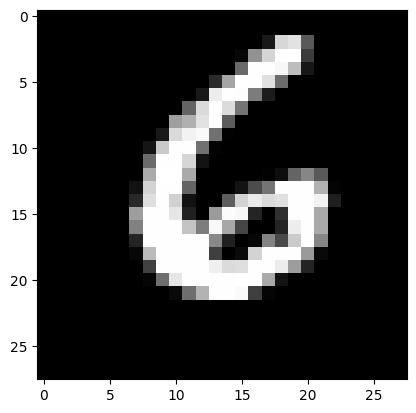

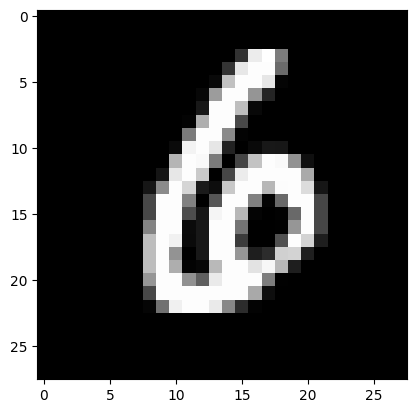

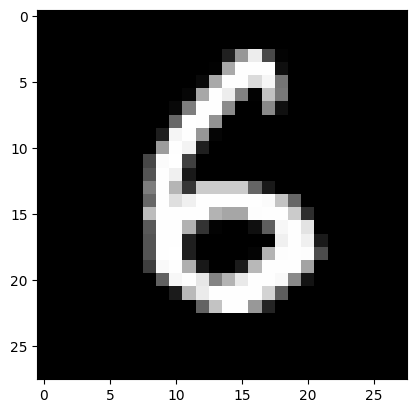

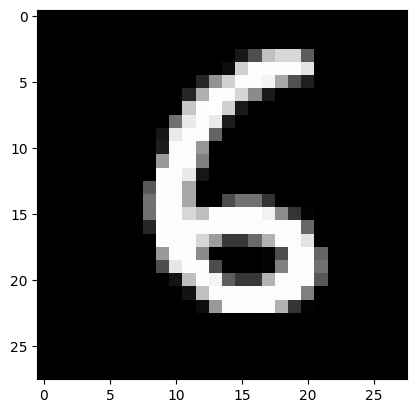

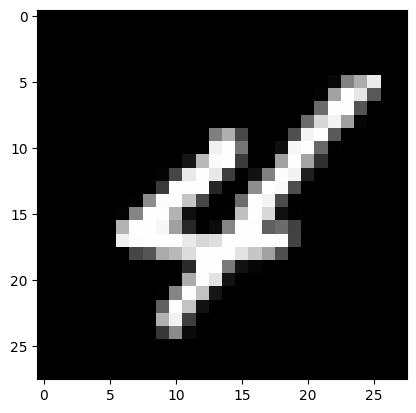

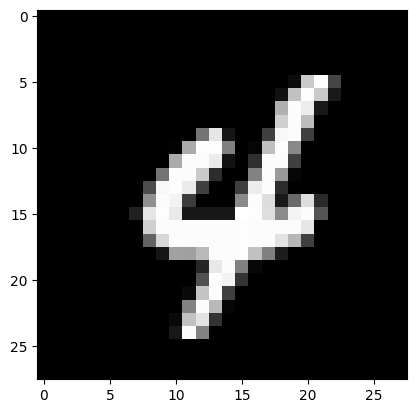

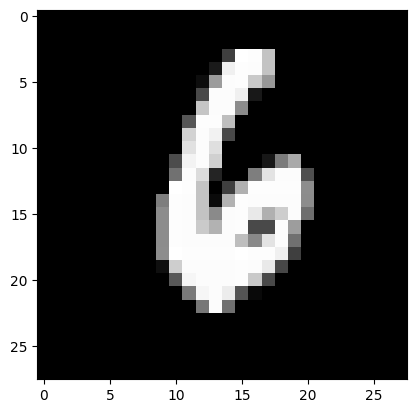

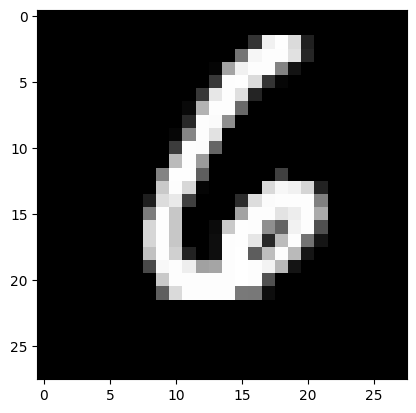

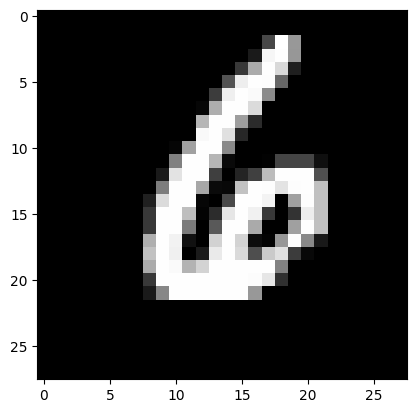

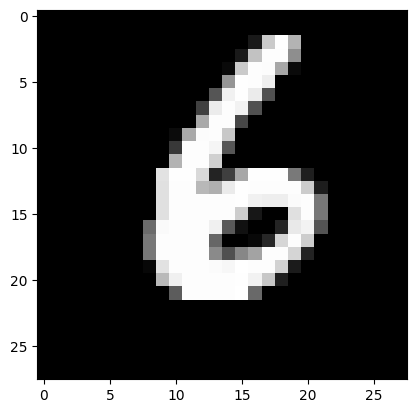

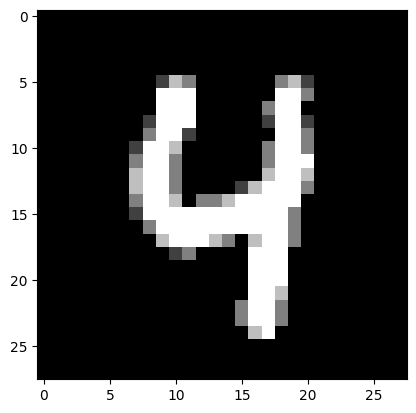

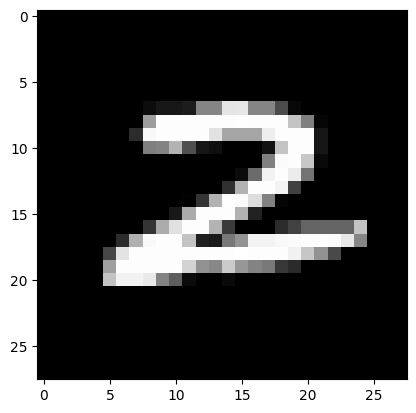

k= 4


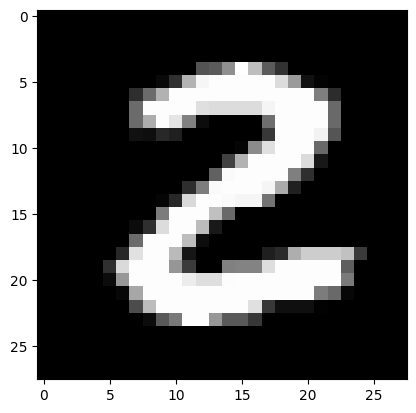

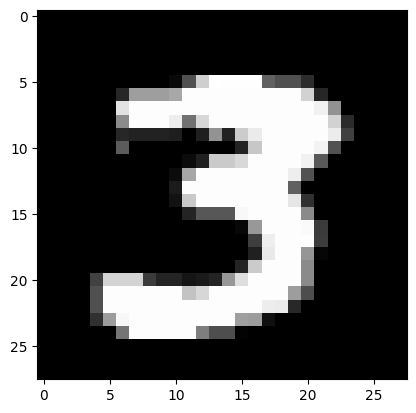

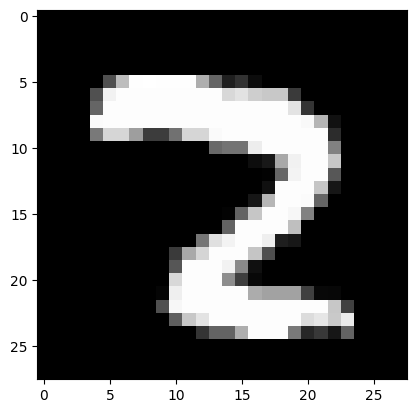

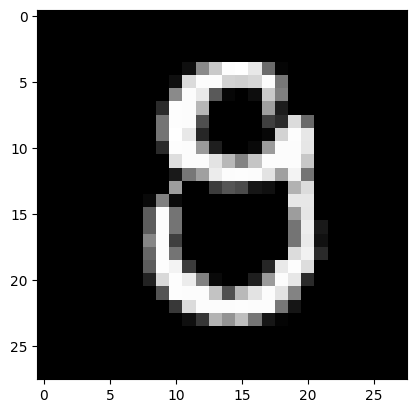

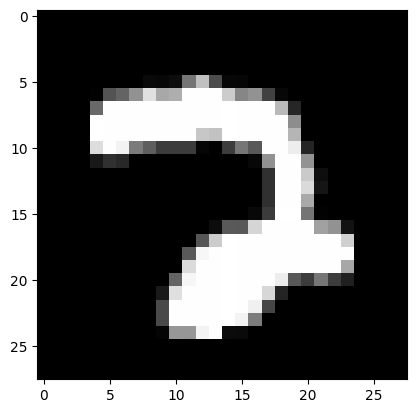

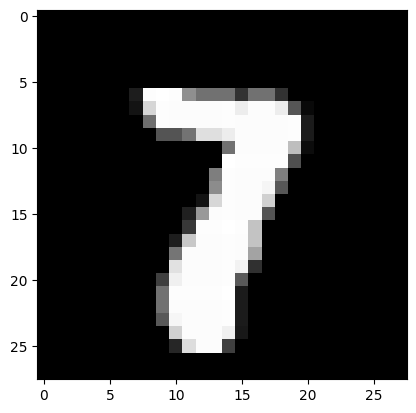

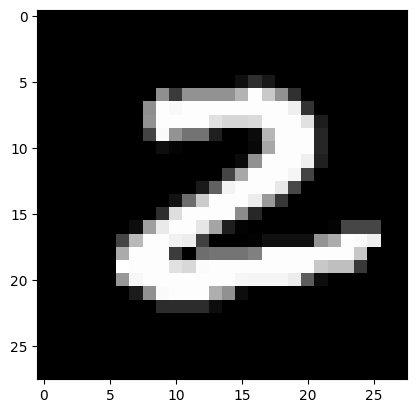

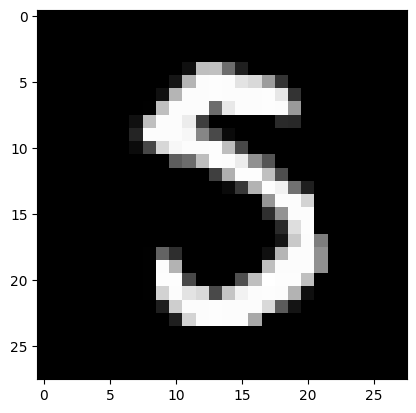

k= 5


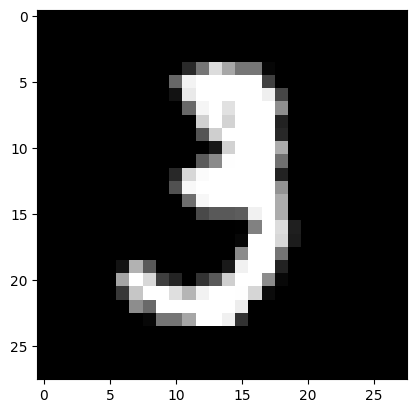

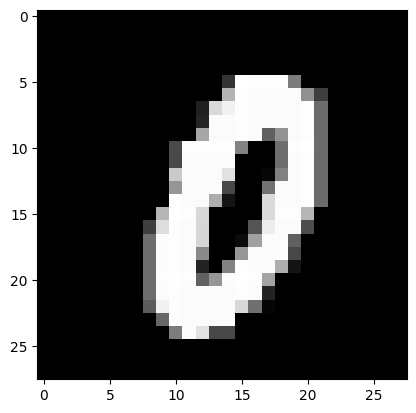

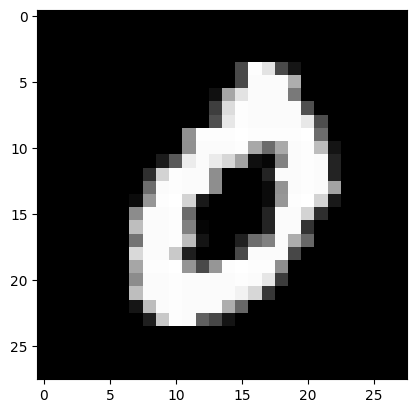

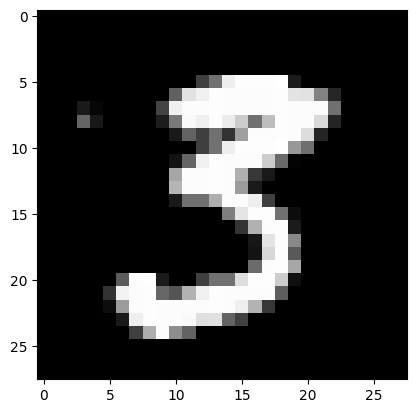

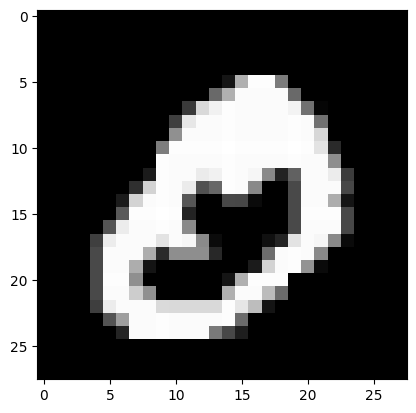

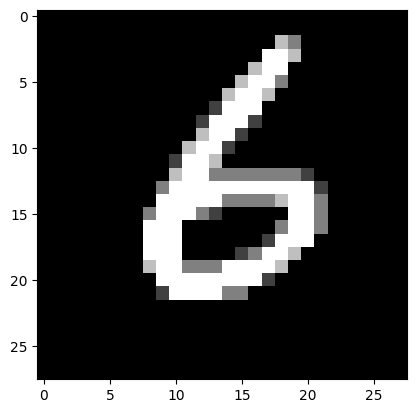

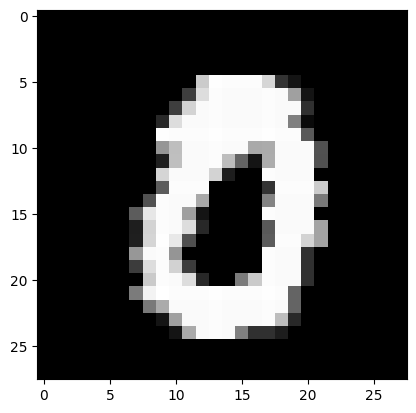

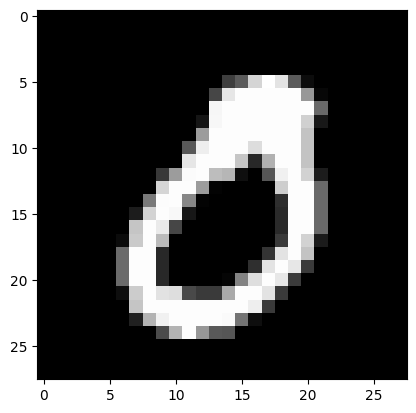

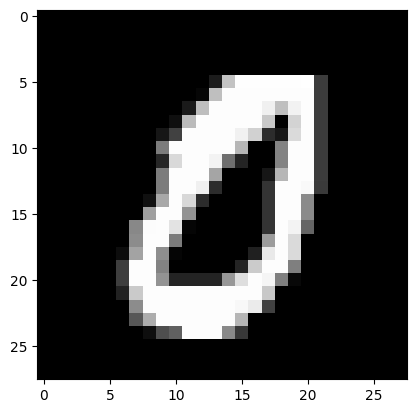

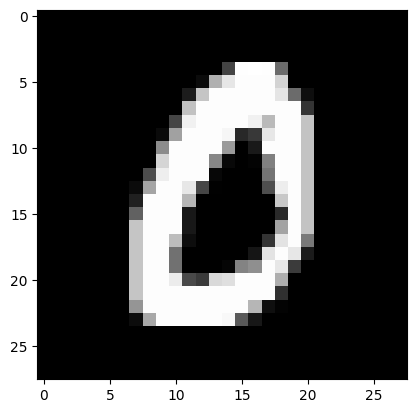

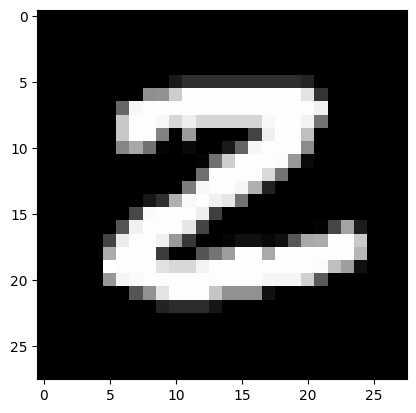

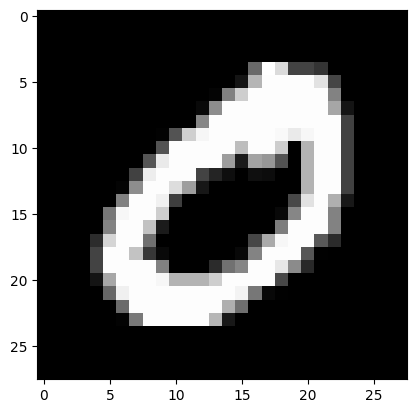

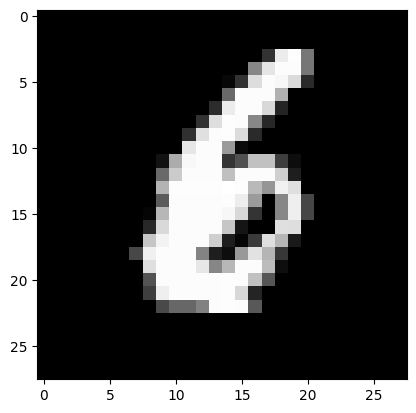

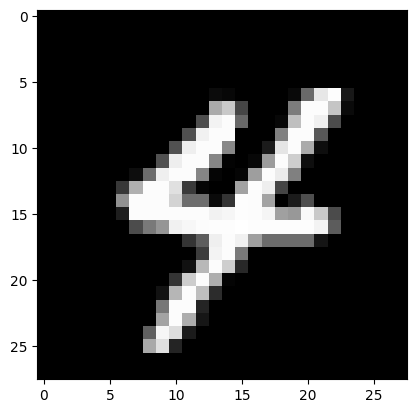

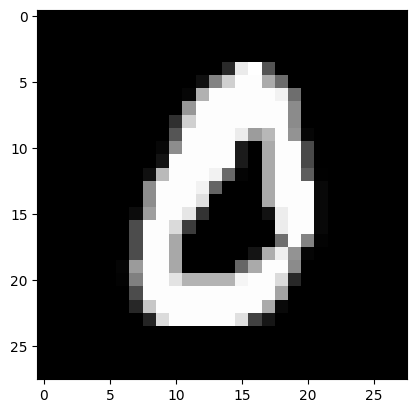

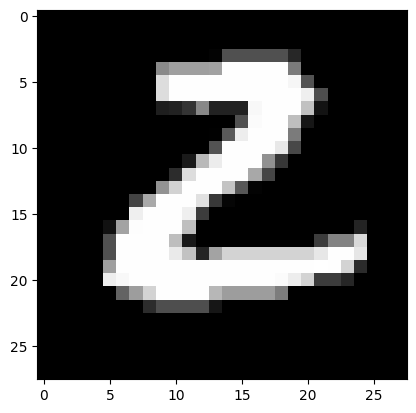

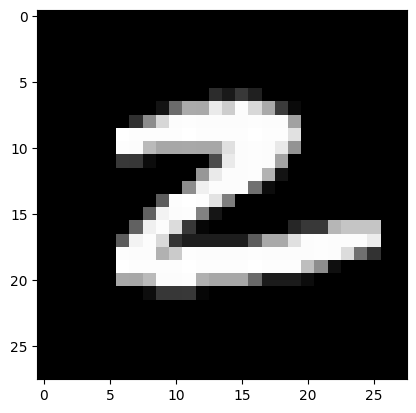

k= 6


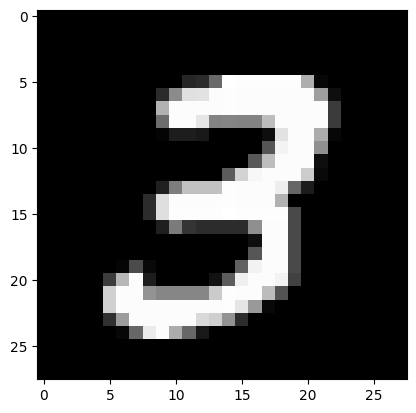

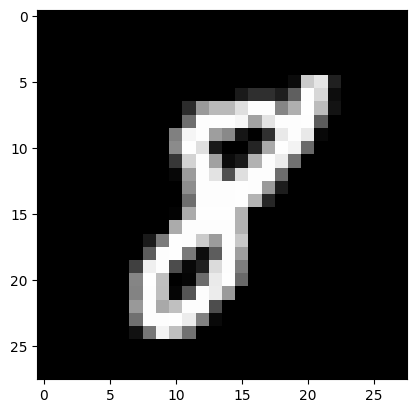

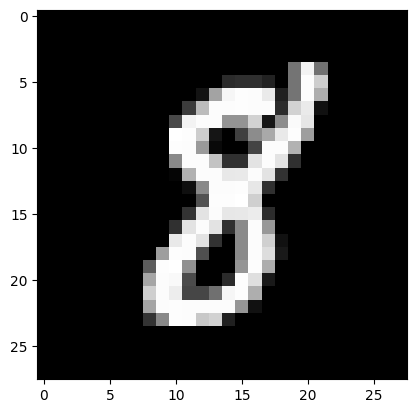

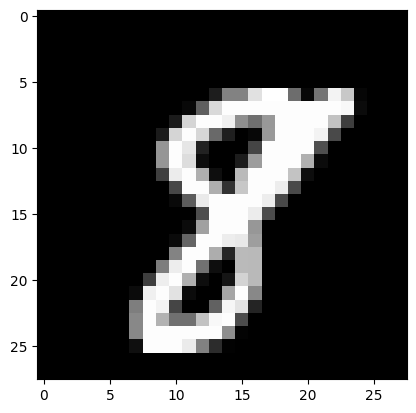

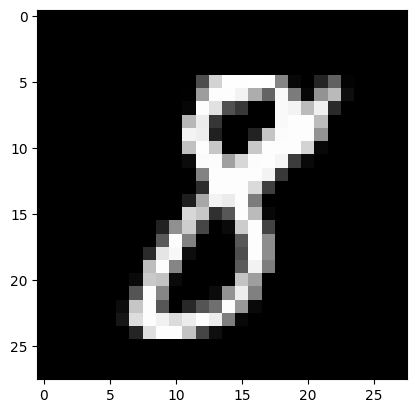

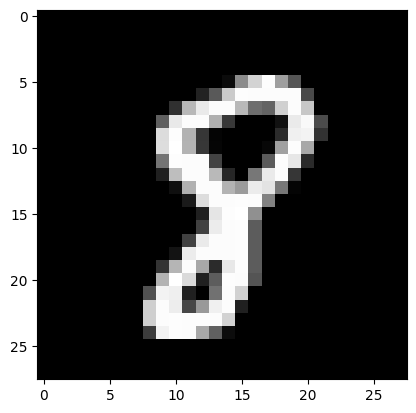

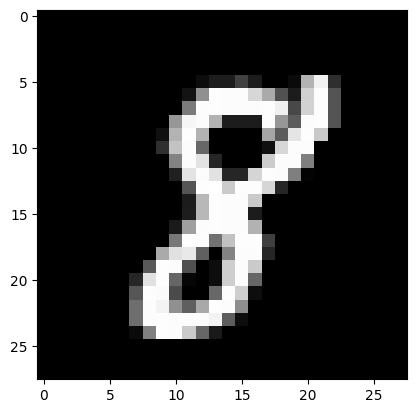

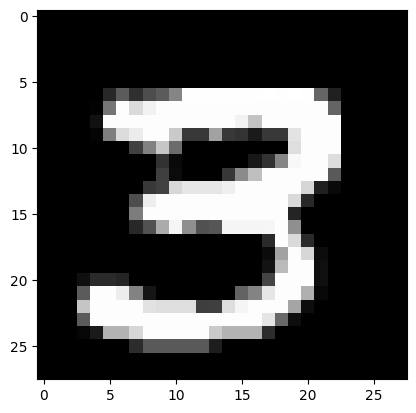

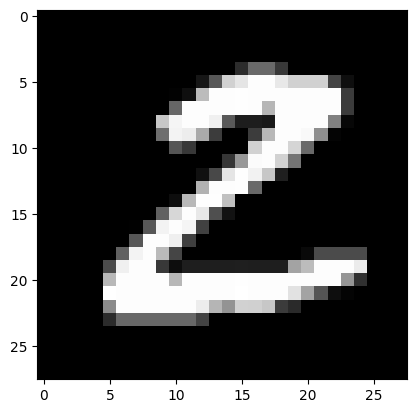

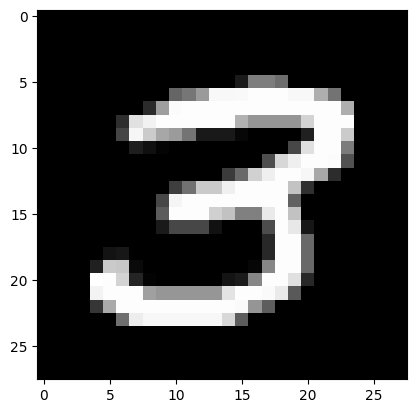

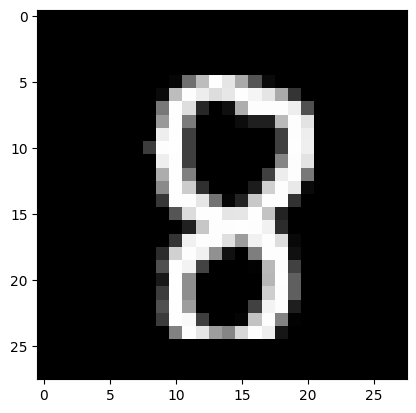

k= 7


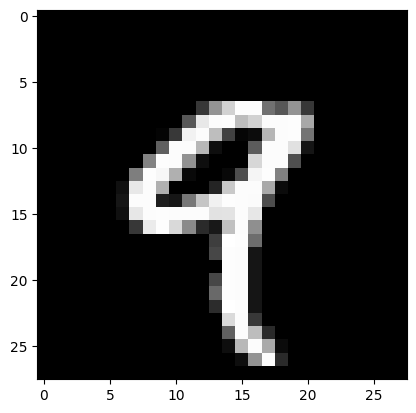

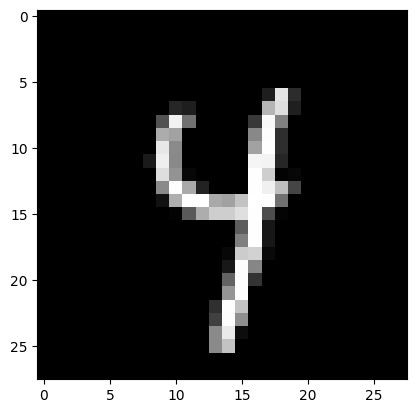

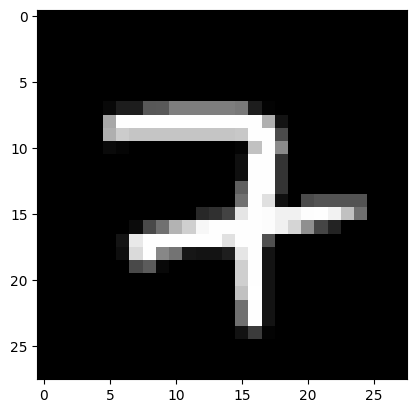

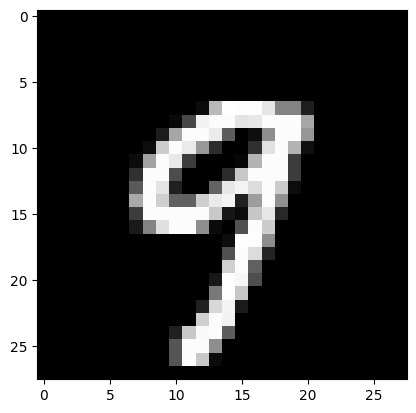

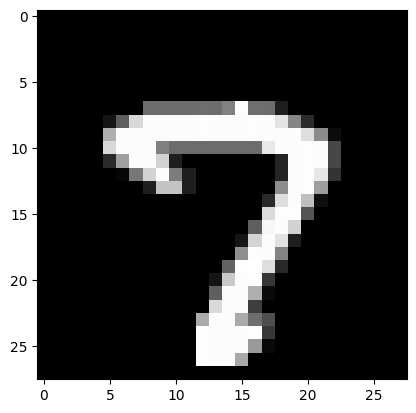

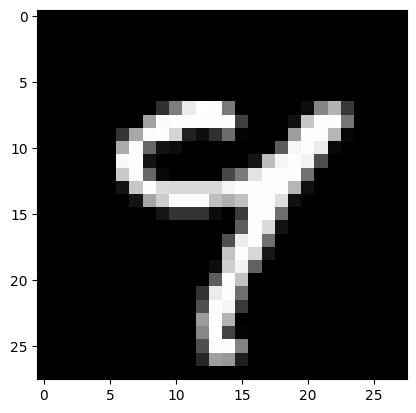

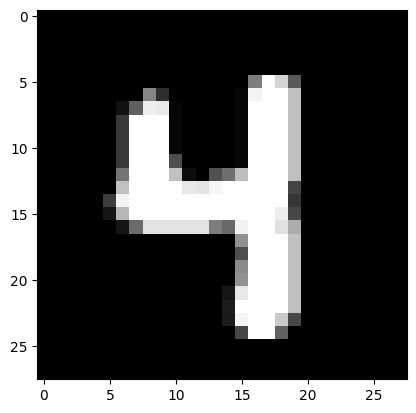

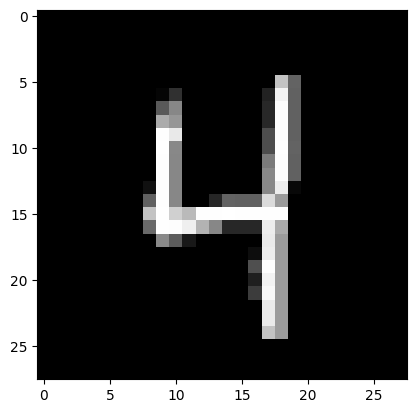

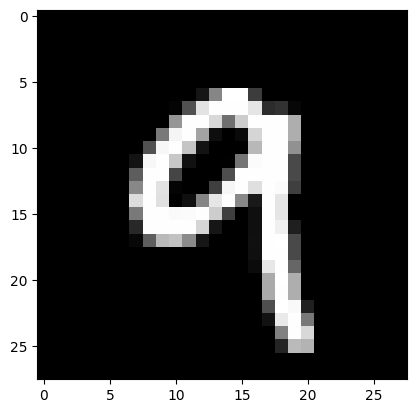

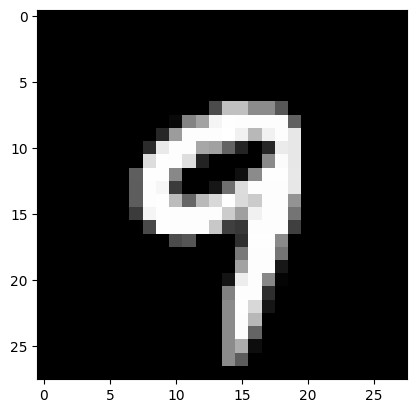

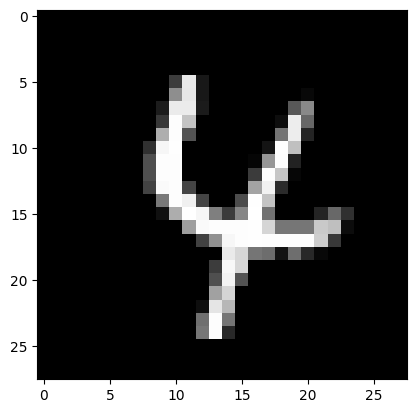

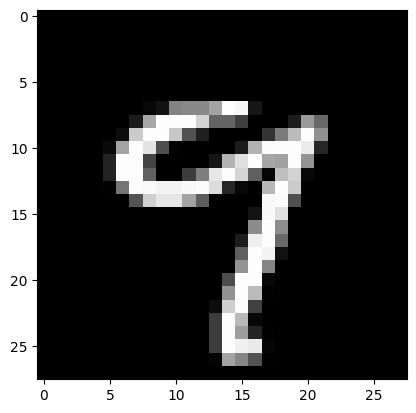

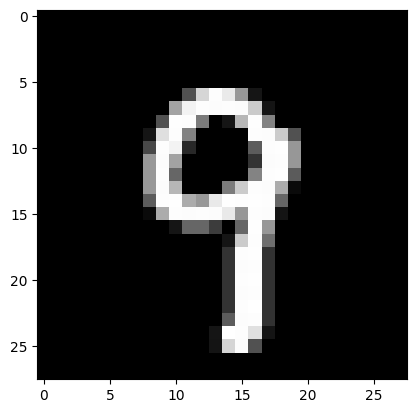

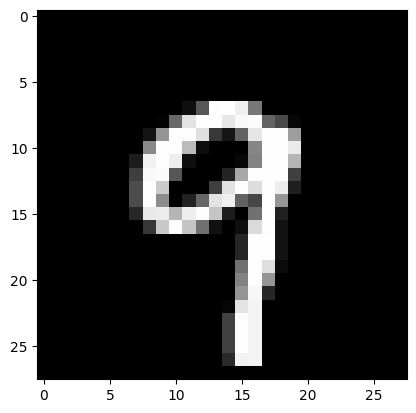

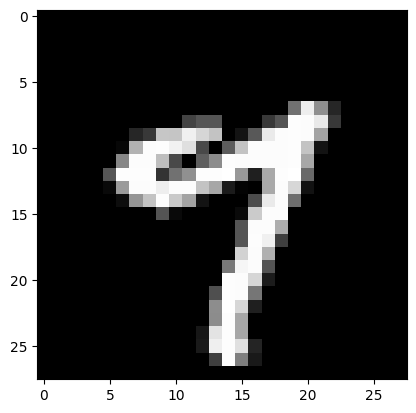

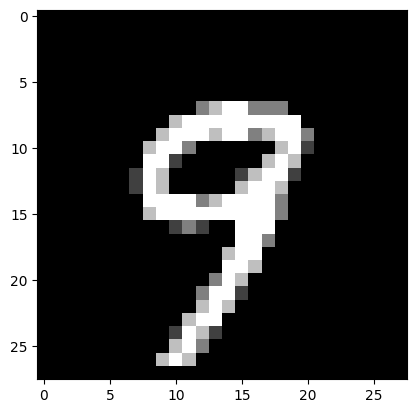

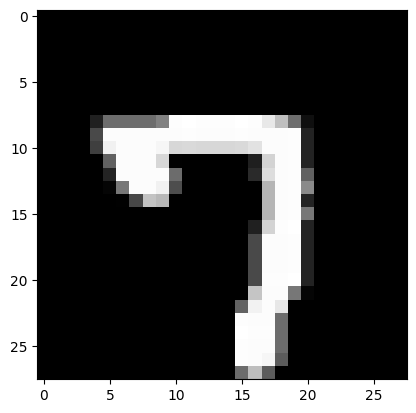

k= 8


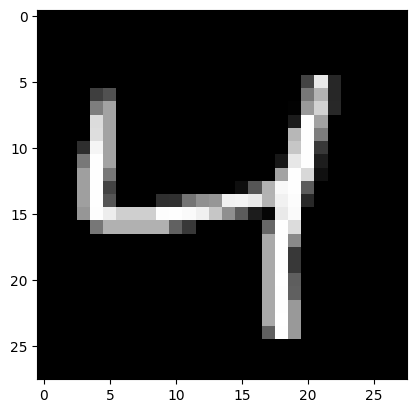

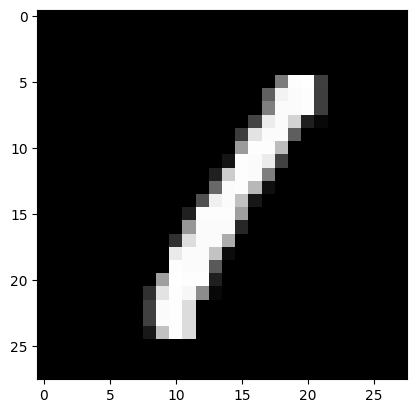

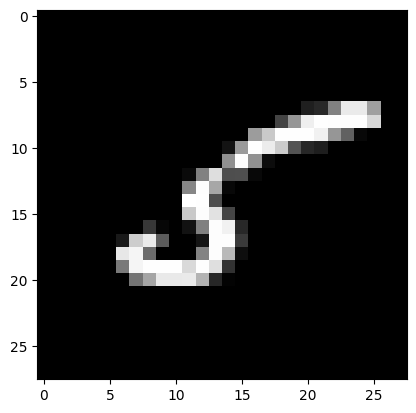

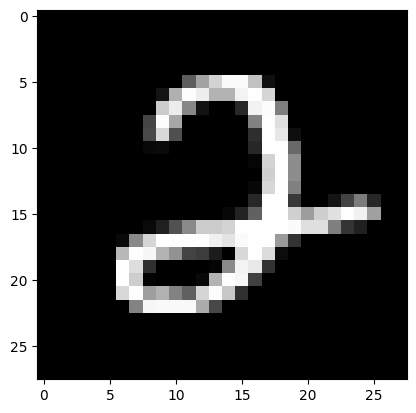

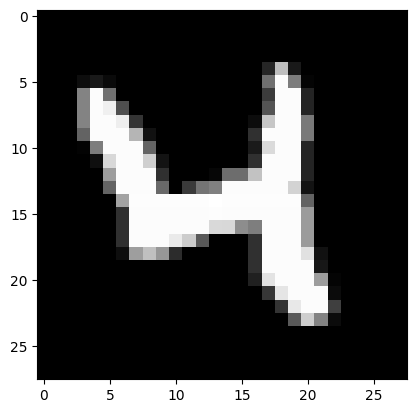

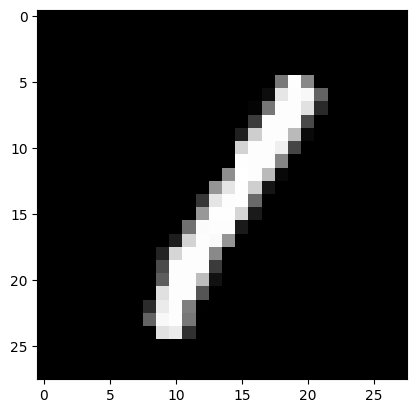

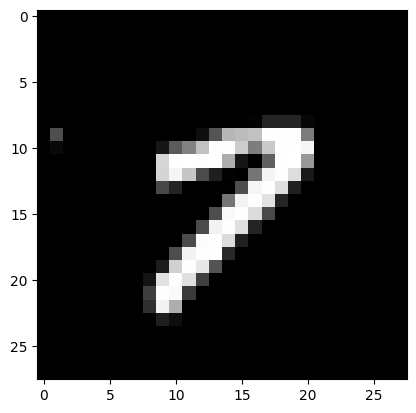

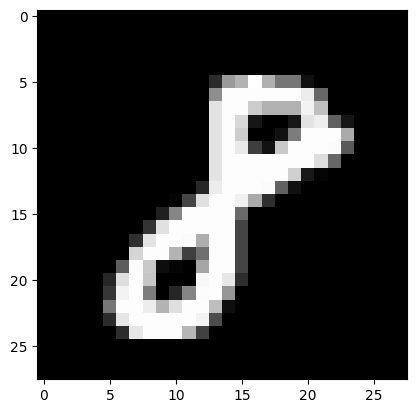

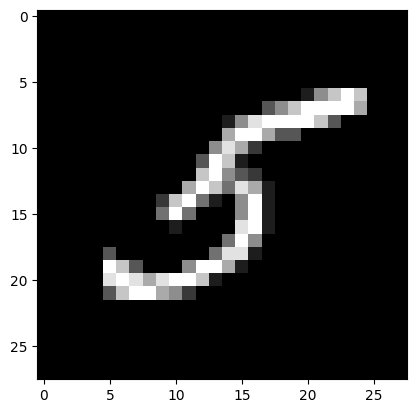

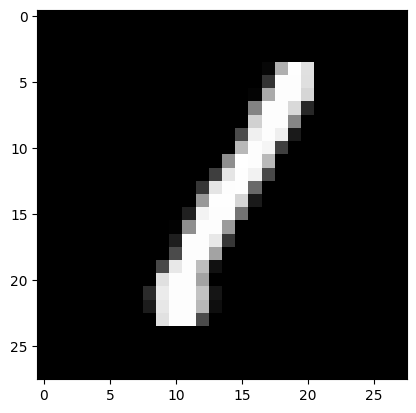

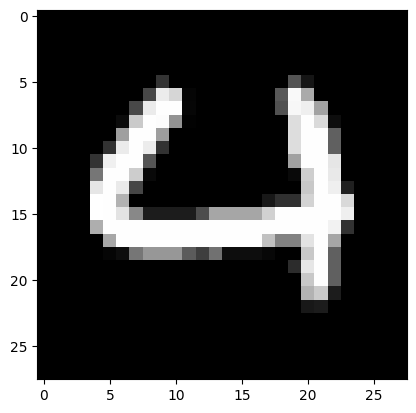

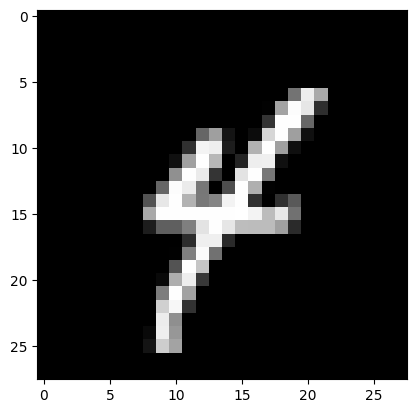

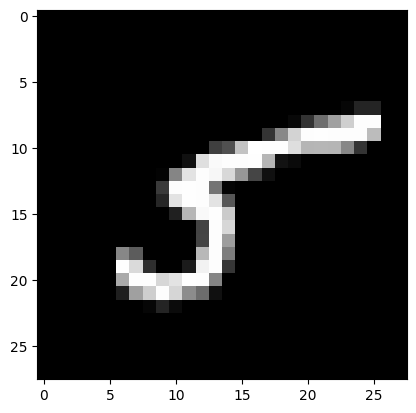

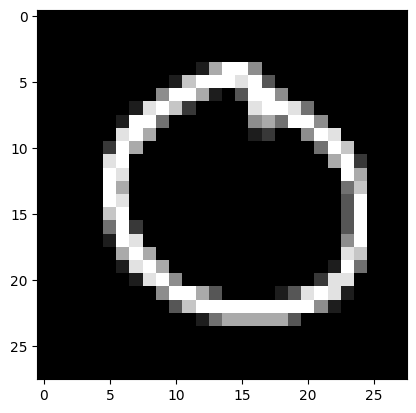

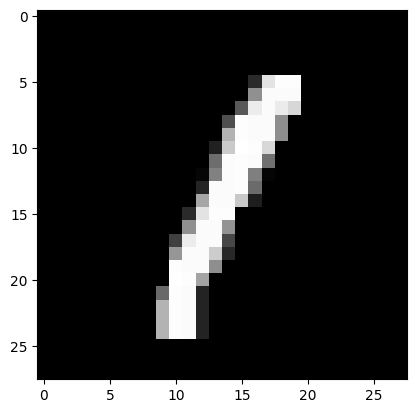

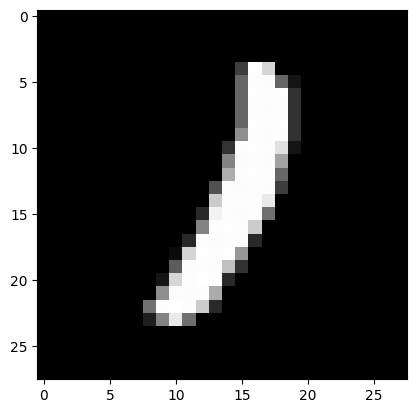

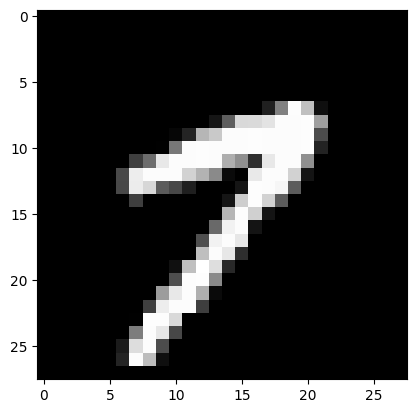

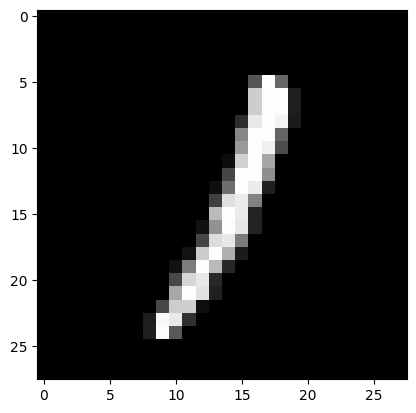

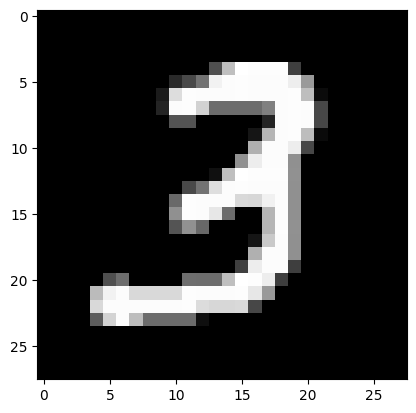

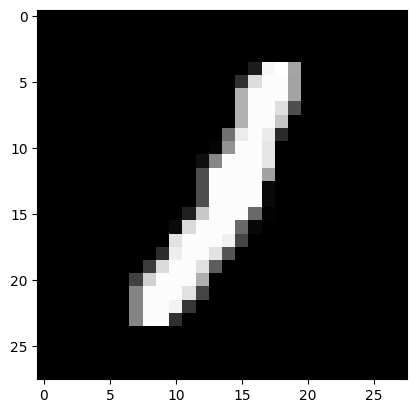

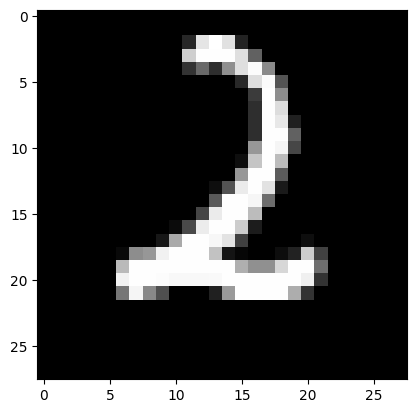

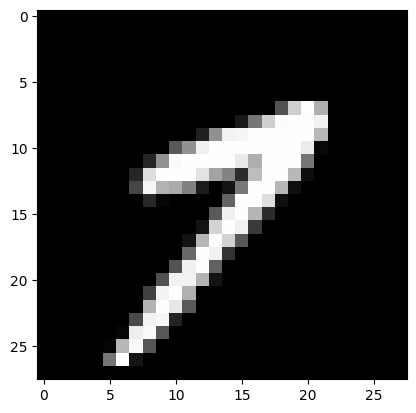

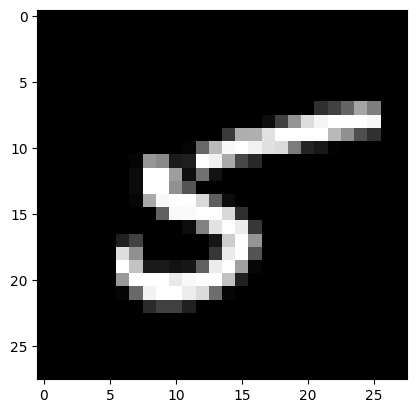

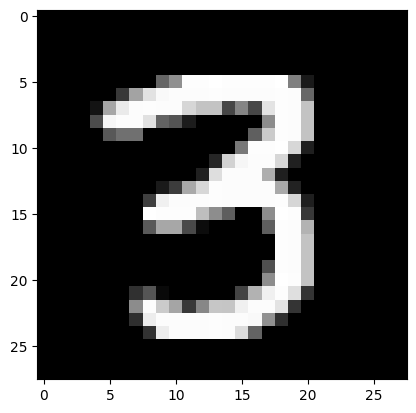

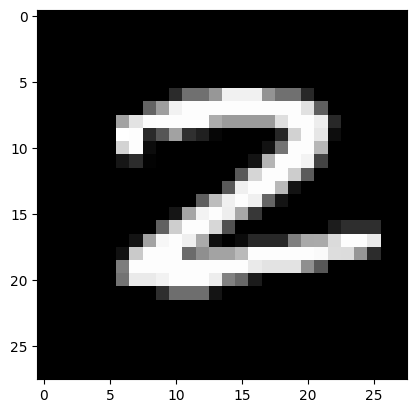

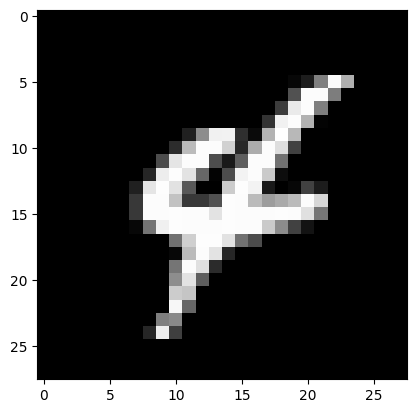

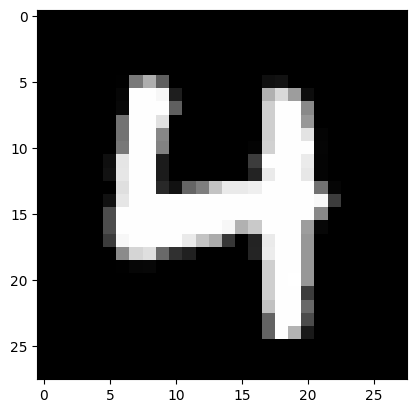

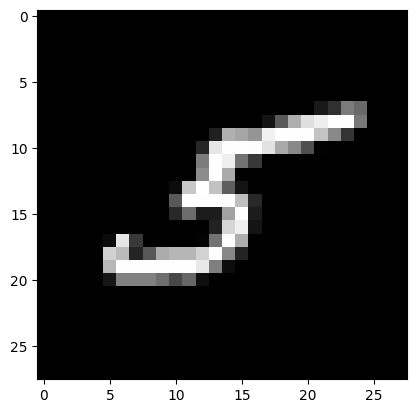

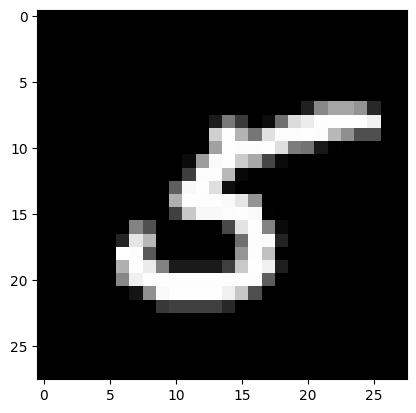

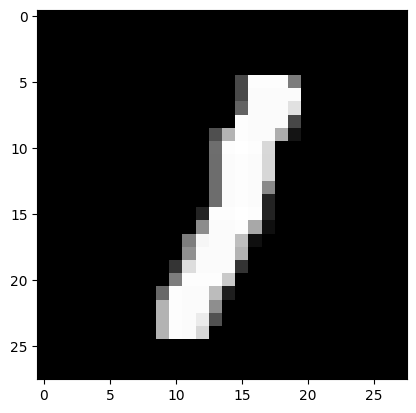

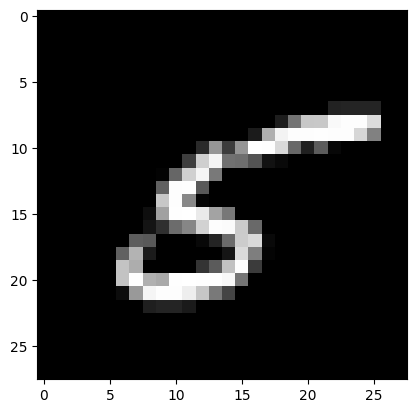

k= 9


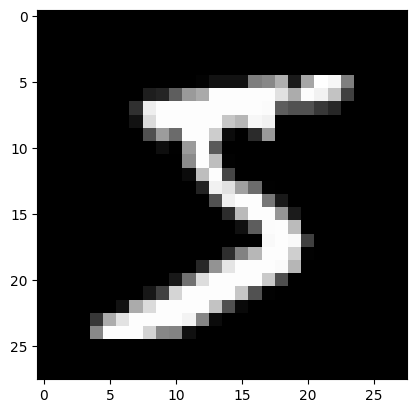

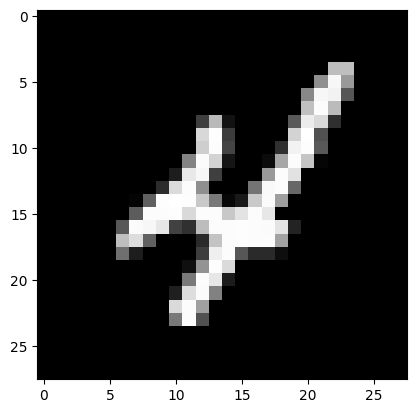

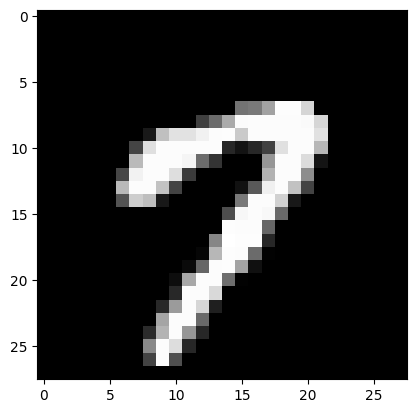

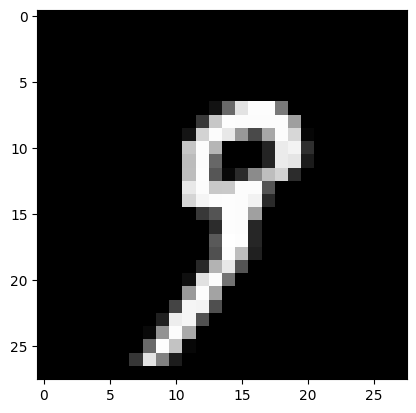

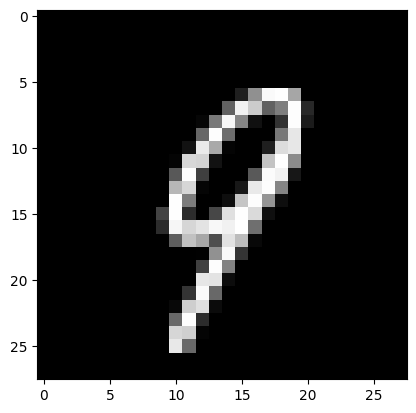

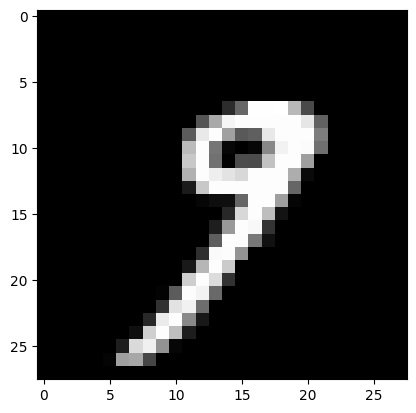

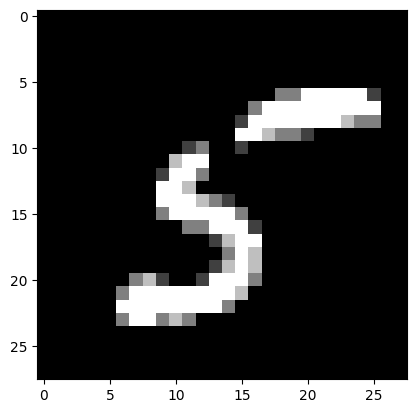

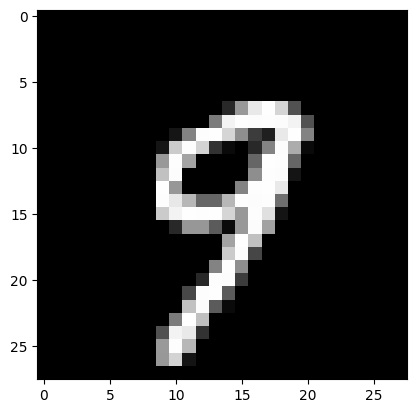

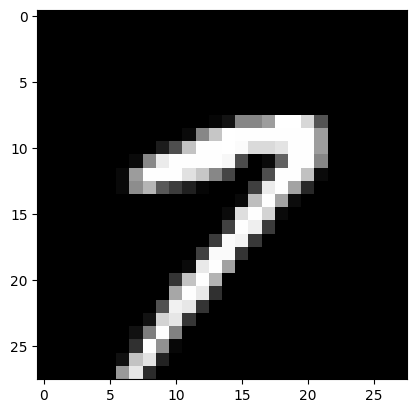

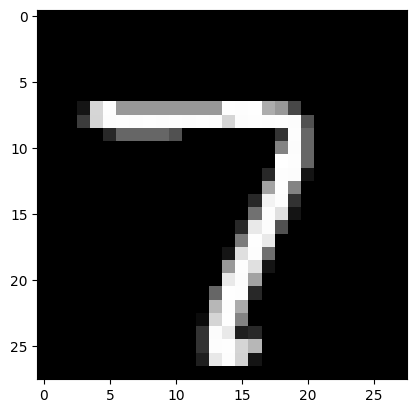

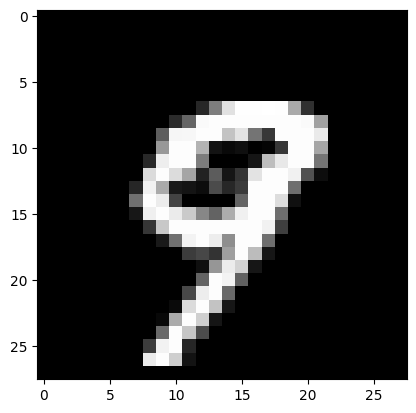

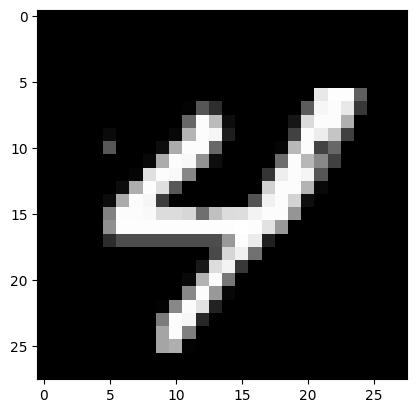

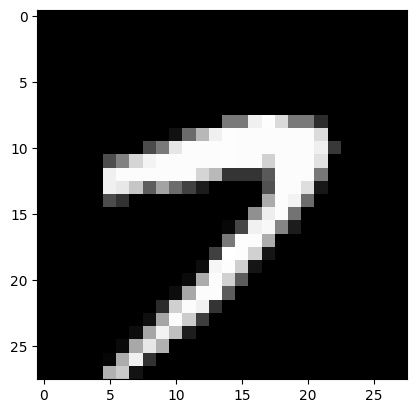

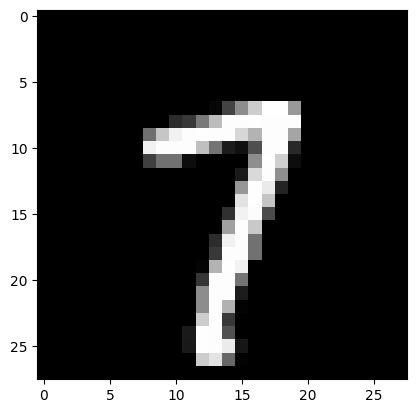

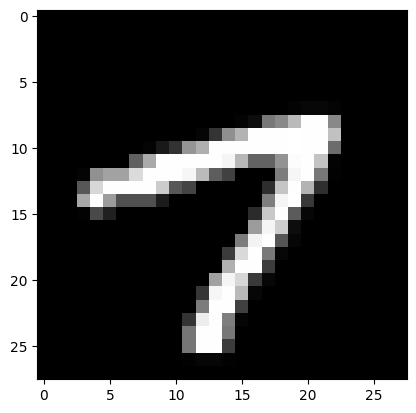

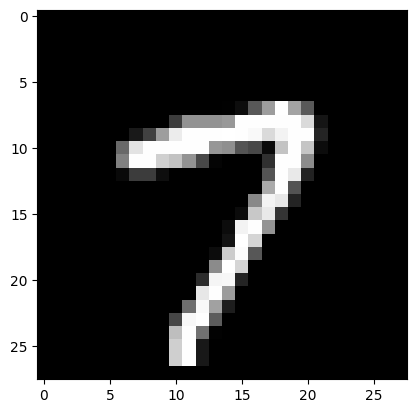

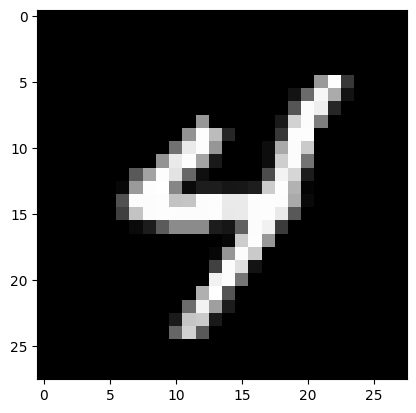

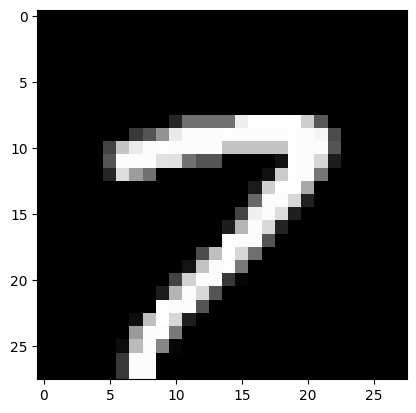

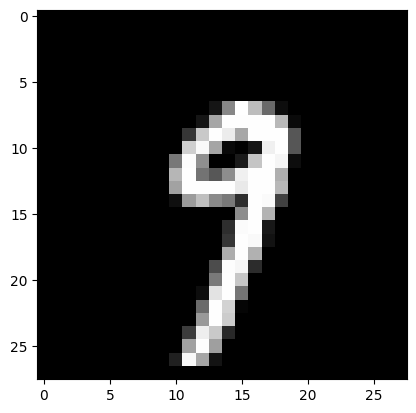

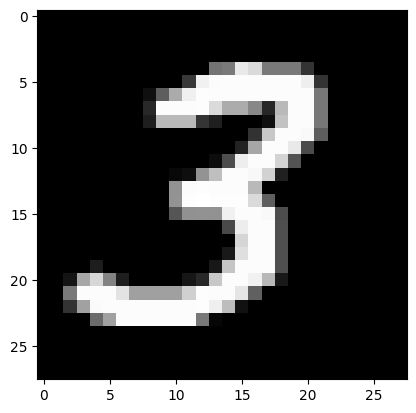

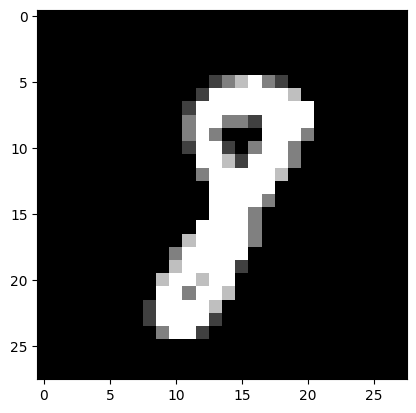

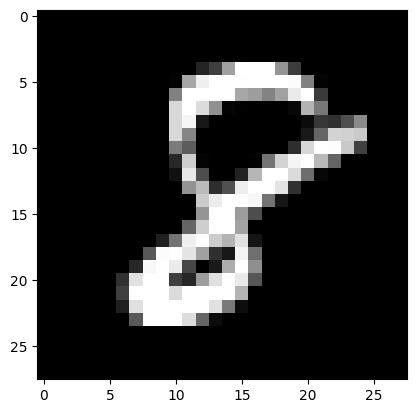

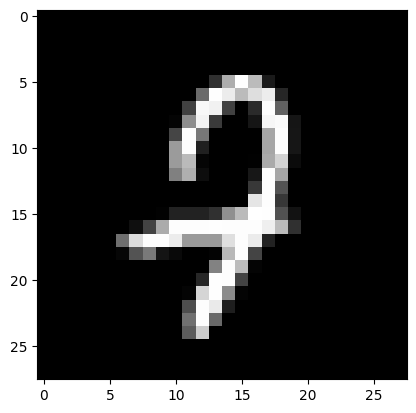

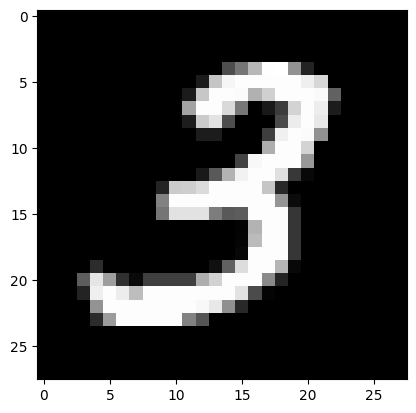

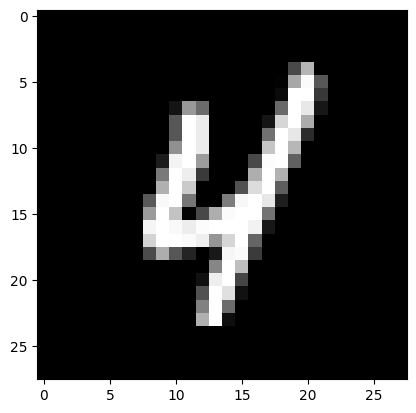

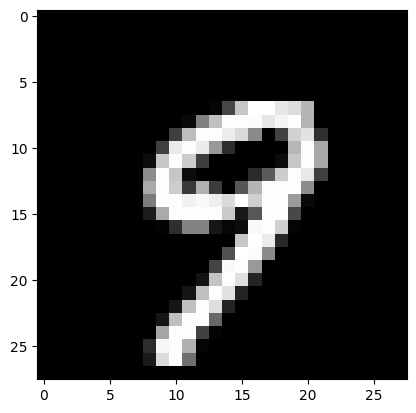

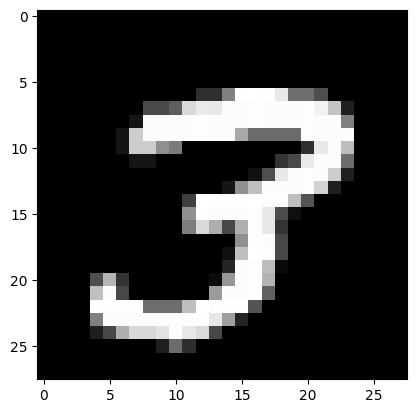

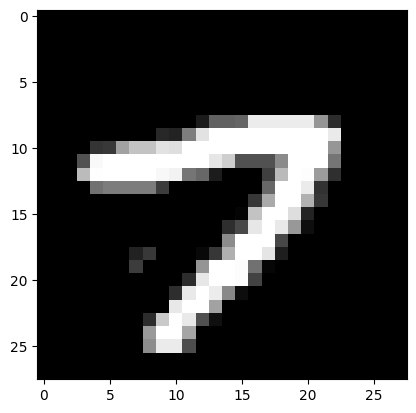

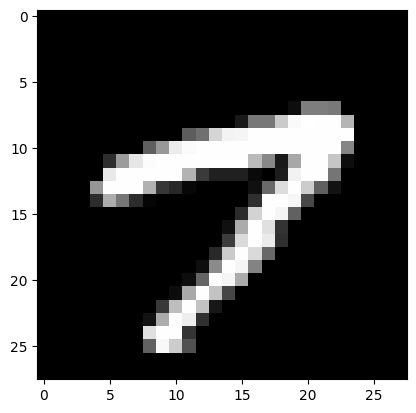

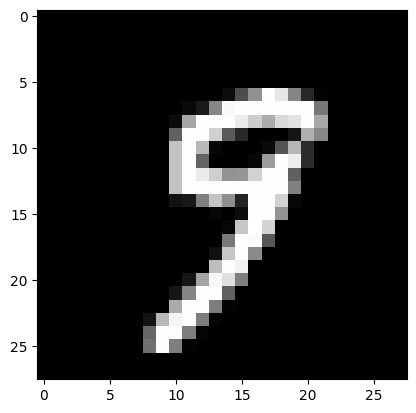

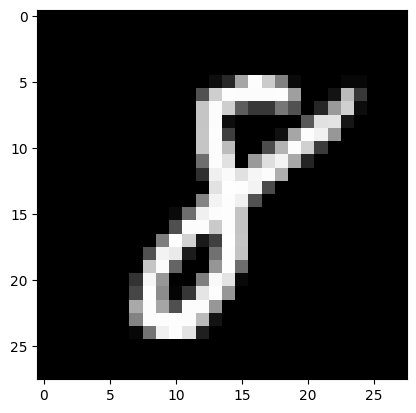

In [30]:
print('Shape is ', encoded_features.shape)
cluster = encoded_features.argmax(axis=1)
#print(cluster)
print(cluster[cluster==0])
for k in range(encoding_dim):
    print('=============================================')
    print('k=', k)
    print('=============================================')
    for i in range(200):
        cl = cluster[i]
        if (cl==k):
            plt.imshow(x_train[i].reshape(28, 28))
            plt.show()